# **CIS 5450 Final Project - Google Playstore App Rating Analysis**
*Anant Aggarwal, Ankita Diwan, Pradipta Kinasih*

# Part 1: Introduction

The primary objective of our project is to analyze the factors influencing app popularity and success. By identifying features that correlate with higher ratings, we aim to provide actionable insights for both developers and marketers. For developers, understanding which attributes impact app success can guide improvements in design and content to align with user preferences. For marketers, this analysis helps optimize promotional strategies and target the right audience effectively. Additionally, the project focuses on predicting app success using key attributes such as rating counts, number of installs, app monetization strategies, and more, offering a comprehensive approach to understanding and enhancing app performance.

# Part 2: Data Loading & Preprocessing

This analysis utilizes several Python libraries to streamline data processing, visualization, statistical testing, and modeling. Pandas and NumPy handle data manipulation and numerical computations, while Matplotlib and Seaborn create insightful visualizations. Statistical tests, such as t-tests, ANOVA, and chi-square, are performed using SciPy Stats. Machine learning models, including linear regression, random forests, and gradient boosting, are implemented with Scikit-learn and XGBoost, with tools like RandomizedSearchCV for hyperparameter tuning and cross_val_score for validation. GPU-accelerated computations are supported by CuPy, and model explanations are enhanced with SHAP and PartialDependenceDisplay. Additional utilities like Joblib, Sys, and GC optimize performance and resource management.

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# import cupy as cp
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import sys
import gc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn.model_selection import learning_curve
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import joblib
import shap
from sklearn.inspection import PartialDependenceDisplay

pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_colwidth", None) #Show full column width
pd.set_option('display.max_columns', None)

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.1 Loading Data & Initializing Dataframe

The data we use is the Google Play Store Apps data from https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps.

In [ ]:
# Load the dataset
file_path = '/content/drive/My Drive/cis 545 final project/dataset/google_playstore.csv'
google_playstore_df = pd.read_csv(file_path)


## 2.2 Cleaning Data



In this section, we assess the dataset's structure by identifying missing values and implementing appropriate strategies to handle them, ensuring the data is clean and ready for analysis.

In [ ]:
pd.set_option('display.max_columns', None)
# Display the first few rows
google_playstore_df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-and-conditions/privacy-policy,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [ ]:
# Check the general information about the dataset
google_playstore_df.info()

# Check for missing values
missing_values = google_playstore_df.isnull().sum()
print("Missing values per column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [ ]:
# Drop columns where more than 50% of the values are missing
threshold = len(google_playstore_df) * 0.5
google_playstore_df = google_playstore_df.dropna(thresh=threshold, axis=1)

# Display the remaining columns
google_playstore_df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

To handle the missing values we first We fill missing numerical values with median and fill missing categorical values with mode.

In [ ]:
# Fill missing numerical values with median
numerical_columns = ['Rating', 'Rating Count', 'Price']
google_playstore_df = google_playstore_df.fillna({col: google_playstore_df[col].median() for col in numerical_columns})


# Fill missing categorical values with mode
categorical_columns = ['Category', 'Content Rating', 'Currency', 'Developer Id']
google_playstore_df = google_playstore_df.fillna({col: google_playstore_df[col].mode()[0] for col in categorical_columns})


# Verify if there are still any missing values
missing_values_after = google_playstore_df.isnull().sum()
print("Missing values per column after handling:\n", missing_values_after)

Missing values per column after handling:
 App Name                  5
App Id                    0
Category                  0
Rating                    0
Rating Count              0
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                  0
Size                    196
Minimum Android        6530
Developer Id              0
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64


We can see from the previous cells that the 'Size' column is an object data when it is supposed to be a numerical data. Therefore, to handle the nan values of the 'Size' column, we convert it into float data and calculate the median.

We also drop columns that are not related to our model, such as the 'Developer Website', 'Released', and 'Privacy Policy' columns.

In [ ]:
# Convert 'Size' to numeric, removing commas
def convert_size(size):
    if isinstance(size, str):
        size = size.replace(',', '')  # Remove commas
        if 'M' in size:
            return float(size.replace('M', '')) * 1e6
        elif 'k' in size:
            return float(size.replace('k', '')) * 1e3
        elif size == 'Varies with device':
            return np.nan
    return size

# Apply the conversion function
google_playstore_df['Size'] = google_playstore_df['Size'].apply(convert_size)

# Convert the 'Size' column to numeric explicitly
google_playstore_df['Size'] = pd.to_numeric(google_playstore_df['Size'], errors='coerce')

# Fill missing 'Size' with the median after conversion
google_playstore_df['Size'] = google_playstore_df['Size'].fillna(google_playstore_df['Size'].median())


# Fill 'Minimum Android' with the mode
google_playstore_df['Minimum Android'] = google_playstore_df['Minimum Android'].fillna(google_playstore_df['Minimum Android'].mode()[0])


# Drop columns that are not crucial for modeling
google_playstore_df = google_playstore_df.drop(['Developer Website', 'Released', 'Privacy Policy'], axis=1)

# Verify if there are still any missing values
missing_values_final = google_playstore_df.isnull().sum()
print("Missing values per column after final handling:\n", missing_values_final)


Missing values per column after final handling:
 App Name              5
App Id                0
Category              0
Rating                0
Rating Count          0
Installs            107
Minimum Installs    107
Maximum Installs      0
Free                  0
Price                 0
Currency              0
Size                  0
Minimum Android       0
Developer Id          0
Developer Email      31
Last Updated          0
Content Rating        0
Ad Supported          0
In App Purchases      0
Editors Choice        0
Scraped Time          0
dtype: int64


For the last step in data cleaning, we drop the remaining 143 rows that still contain nan values and save the cleaned data to be used for later parts.

In [ ]:
# Drop rows with missing values
google_playstore_df = google_playstore_df.dropna()

# Verify if there are still any missing values
final_missing_values_check = google_playstore_df.isnull().sum()
print("Missing values per column after dropping remaining rows:\n", final_missing_values_check)

# Display the shape of the final cleaned dataset
print("Shape of the cleaned dataset:", google_playstore_df.shape)

Missing values per column after dropping remaining rows:
 App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Developer Id        0
Developer Email     0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
Scraped Time        0
dtype: int64
Shape of the cleaned dataset: (2312801, 21)


In [ ]:
# Save the cleaned dataset to Google Drive
cleaned_file_path = '/content/drive/My Drive/cis 545 final project/dataset/google_playstore_cleaned.csv'
google_playstore_df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")

# Part 3: Exploratory Data Analysis

## 3.1 Analyzing Data Summary

In this section, we perform an initial investigation of the cleaned dataset to uncover patterns, trends, and insights through visualizations and summary statistics, laying the groundwork for further analysis.

In [2]:
# Load the cleaned dataset from Google Drive
cleaned_file_path = '/content/drive/My Drive/cis 545 final project/dataset/google_playstore_cleaned.csv'
google_playstore_df = pd.read_csv(cleaned_file_path)

pd.set_option('display.max_columns', None)

# Display the first few rows to verify the loaded dataset
google_playstore_df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Email,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10000000.0,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020",Everyone,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2900000.0,5.0 and up,Webserveis,webserveis@gmail.com,"May 06, 2021",Everyone,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3700000.0,4.0.3 and up,Cabin Crew,vnacrewit@gmail.com,"Aug 19, 2019",Everyone,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1800000.0,4.0.3 and up,Climate Smart Tech2,climatesmarttech2@gmail.com,"Oct 13, 2018",Everyone,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6200000.0,4.1 and up,Rafal Milek-Horodyski,rmilekhorodyski@gmail.com,"Nov 12, 2018",Everyone,False,False,False,2021-06-15 20:19:35


We first use describe() to summarize the key statistics of numerical features in the dataset, helping us understand their distributions and identify any anomalies.

In [ ]:
# Display statistical summary of numerical features
google_playstore_df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price,Size
count,2.312801e+06,2.312801e+06,2.312801e+06,2.312801e+06,2.312801e+06,2.312801e+06
mean,2.210000e+00,2.836726e+03,1.834473e+05,3.202166e+05,1.035030e-01,1.890287e+07
std,2.096960e+00,2.111172e+05,1.513156e+07,2.355568e+07,2.633207e+00,2.355032e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+03
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00,5.100000e+06
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00,1.000000e+07
75%,4.300000e+00,4.100000e+01,5.000000e+03,7.353000e+03,0.000000e+00,2.400000e+07
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02,1.020000e+09


Observations from Summary Statistics:

**Rating:** Mean rating is 2.21, but 50% of apps have a rating of 2.9 or below. The max is 5, as expected, but a minimum rating of 0 suggests missing or low-quality ratings.
We'll need to explore the Rating column further, possibly visualizing its distribution.

**Rating Count:** There are some high values, with a maximum of over 138 million ratings. This suggests a few popular apps with a significant number of ratings while most have fewer.The standard deviation is also high, suggesting a lot of variability in the number of ratings per app.


**Price:** Most apps are free, as indicated by the median price being 0. However, the maximum price is $400, which may be an outlier or an unusual app. We need to visualize this data and possibly address the outliers.


**Minimum Installs and Maximum Installs:** The minimum and maximum values in these columns vary widely, indicating significant differences in app popularity. We will need to explore the relationships between these and other features.


## 3.2 Analyzing Numerical Feature Distributions & Handling Outliers

This section explores the distribution of numerical features using histograms, identifies and addresses outliers through boxplots, and concludes with a heatmap to visualize relationships between features.

### 3.2.1 Numerical Feature Distributions

Before calculating the distributions, we perform additional preprocessing on the 'Price' column by converting all currencies to USD.

In [3]:
# Convert non-USD currencies to USD (assuming approximate conversion rates)
conversion_rates = {
    'EUR': 1.2, 'INR': 0.013, 'GBP': 1.35, 'CAD': 0.8, 'BRL': 0.18, 'KRW': 0.00085, 'TRY': 0.11,
    'RUB': 0.014, 'SGD': 0.75, 'AUD': 0.73, 'PKR': 0.0064, 'ZAR': 0.065, 'XXX': 1.0
}

# Update prices based on the conversion rates
for currency, rate in conversion_rates.items():
    google_playstore_df.loc[google_playstore_df['Currency'] == currency, 'Price'] *= rate

# Set all currency to USD for simplicity
google_playstore_df['Currency'] = 'USD'

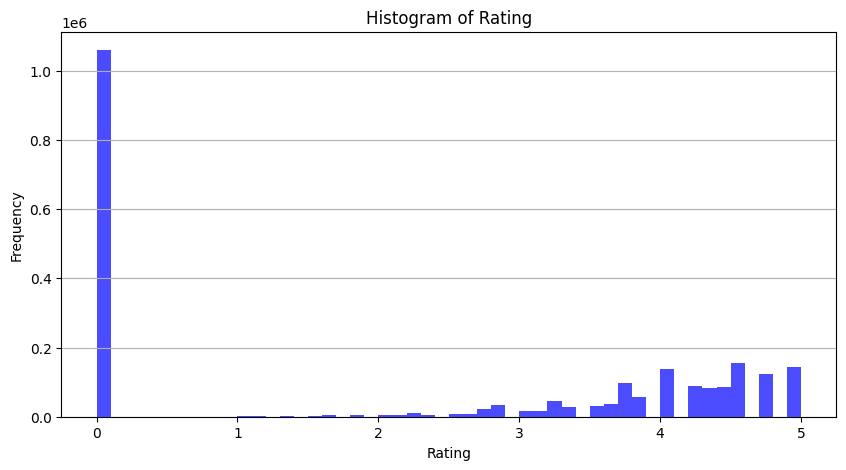

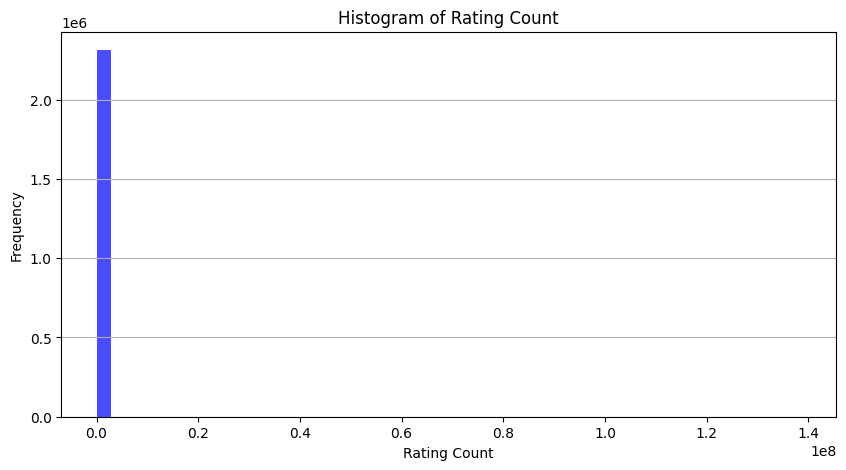

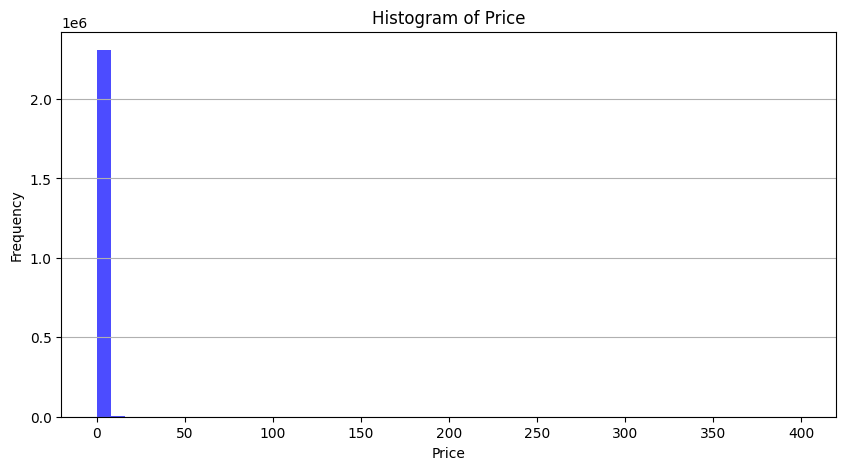

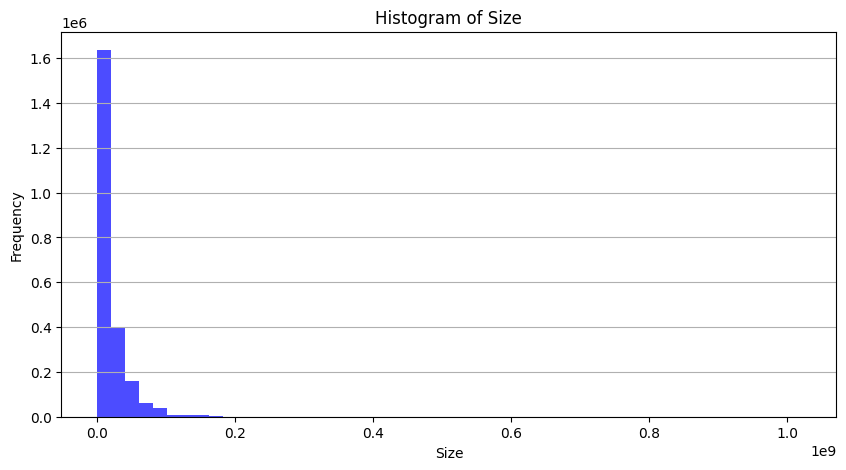

In [4]:
# List of numerical columns to visualize
columns_to_plot = ['Rating', 'Rating Count', 'Price', 'Size']

# Plot histograms for each column
for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(google_playstore_df[col], bins=50, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

**Observations from Histograms:**

**Rating:** A large number of apps have a rating of zero, which could indicate missing or unrated apps. We may consider treating these zeros as missing data, or at least investigating whether they represent true values.
Ratings above 4 are more common, which is expected for apps that have good quality.

**Rating Count:** The distribution is heavily skewed towards zero. Most apps have very few ratings, and a small subset of apps have an extremely high number of ratings. We should consider applying a logarithmic transformation to this variable during modeling to handle the skew.

**Price:** Most apps are free (Price = 0). There are very few apps with prices greater than zero, and the max price extends to $400, which could be an outlier.
We need to consider handling these extreme values, possibly by capping the prices or creating categories to deal with free vs. paid apps.

**Size:** The size distribution is also heavily skewed to the left. Most apps are relatively small, but some are significantly larger. Again, a transformation may be needed for normalization.


### 3.2.2 Handling Outliers & Transforming Data

This section focuses on mitigating the impact of extreme outliers in numerical features (Rating Count, Price, and Size) to ensure accurate analysis and robust model performance. We use techniques such as capping and logarithmic transformation to reduce the influence of these outliers and prepare the data for further analysis and modeling.

**Capping Values**:  
  - Cap extreme values for **Price** and **Rating Count** at a reasonable limit (e.g., 99th percentile) to minimize their impact on modeling.  
  - For **Size**, capping or applying a logarithmic transformation can help reduce the influence of outliers effectively.  

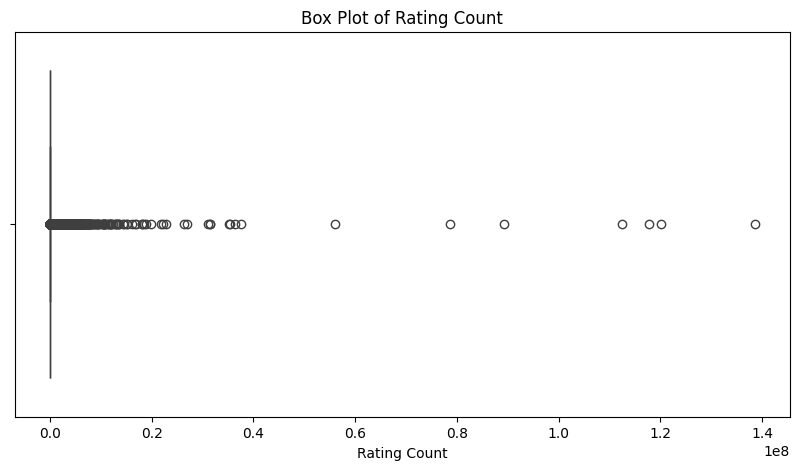

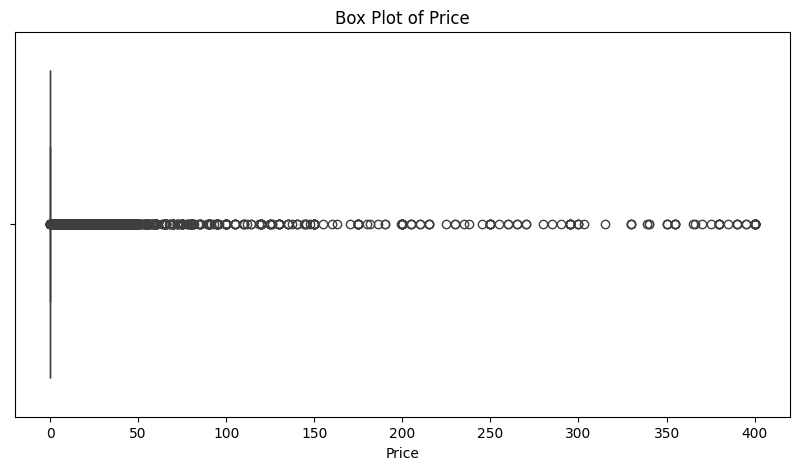

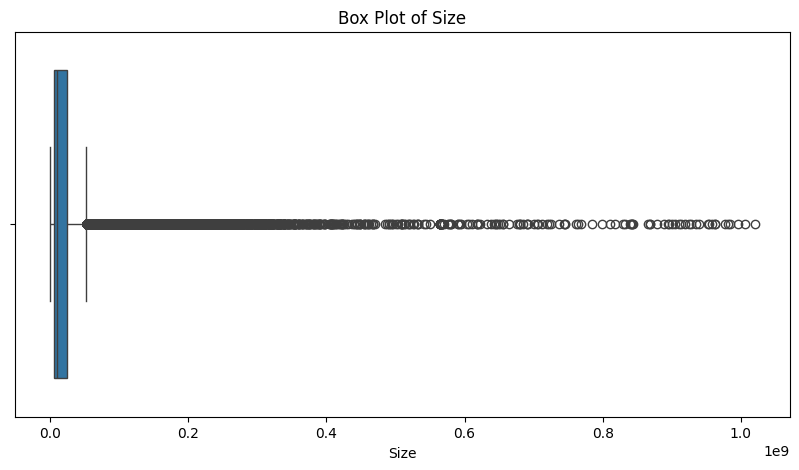

In [5]:
# Plot box plots for numerical columns to detect outliers
columns_to_plot = ['Rating Count', 'Price', 'Size']

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=google_playstore_df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

**Observations from Box Plots:**

**Rating Count:**

There are several extreme outliers, with some apps having up to 138 million ratings.
The majority of apps have very few ratings, but these outliers can skew model performance if left untreated.

**Price:**

The majority of apps are free, but we see extreme outliers with prices going up to \$400. Most apps are priced below \$100, indicating that values above this might be outliers or specialty apps.

**Size:**

Similar to Rating Count, the size is heavily skewed with many extreme outliers. The majority of apps have relatively small sizes compared to a few very large ones.

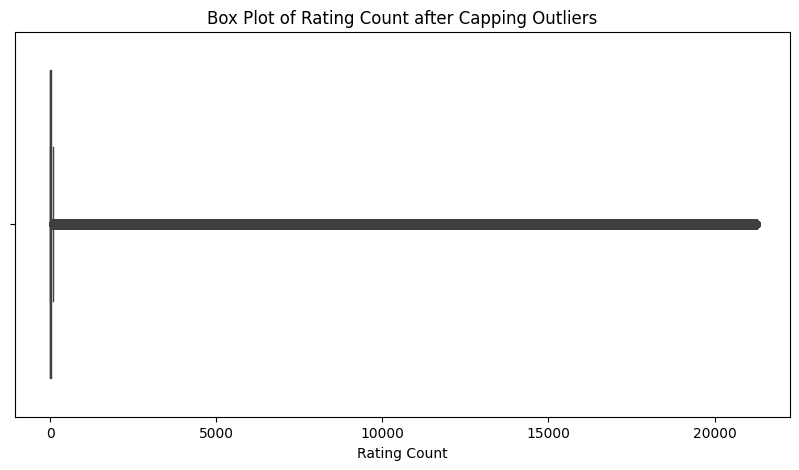

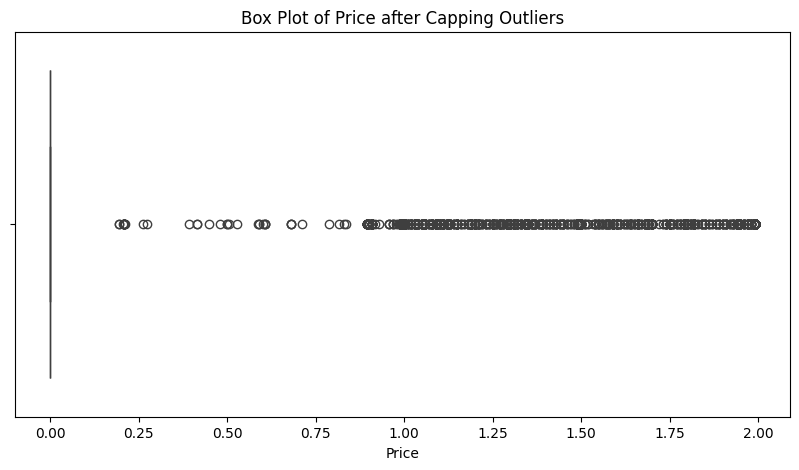

In [6]:
# Cap Price and Rating Count to 99th percentile to handle extreme outliers
price_cap = google_playstore_df['Price'].quantile(0.99)
rating_count_cap = google_playstore_df['Rating Count'].quantile(0.99)

google_playstore_df['Price'] = google_playstore_df['Price'].apply(lambda x: price_cap if x > price_cap else x)
google_playstore_df['Rating Count'] = google_playstore_df['Rating Count'].apply(lambda x: rating_count_cap if x > rating_count_cap else x)

# Verify the changes with new box plots
columns_to_plot = ['Rating Count', 'Price']

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=google_playstore_df[col])
    plt.title(f'Box Plot of {col} after Capping Outliers')
    plt.show()


**Rating Count:** The maximum Rating Count is now below 20,000, which is more reasonable than the original values of over 138 million.
This makes the data more balanced and should improve model performance by reducing the influence of a few highly rated apps.

**Price:** After capping, the price values are now constrained to the 99th percentile, which is approximately $2. This is much more representative of the majority of the apps that are either free or priced very low.
This also addresses the highly skewed distribution, making the data more useful for modeling.

**Logarithmic Transformation**:  
- Apply a logarithmic transformation to **Rating Count** and **Size** to normalize the data, making it more suitable for model training and improving performance.


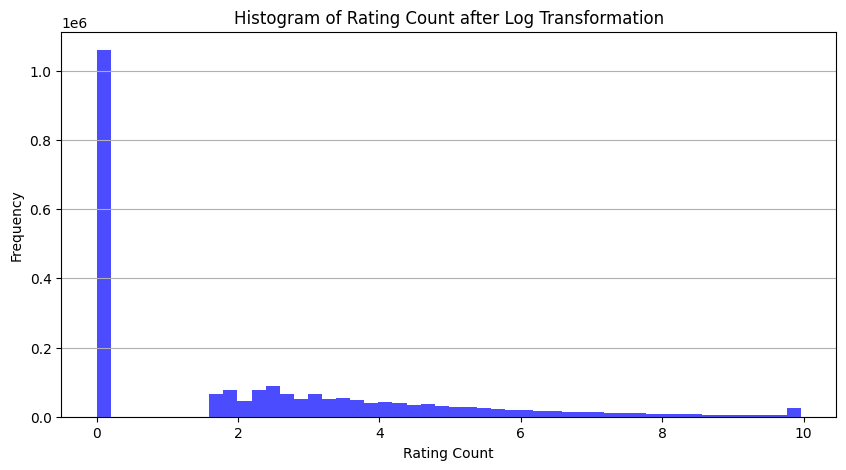

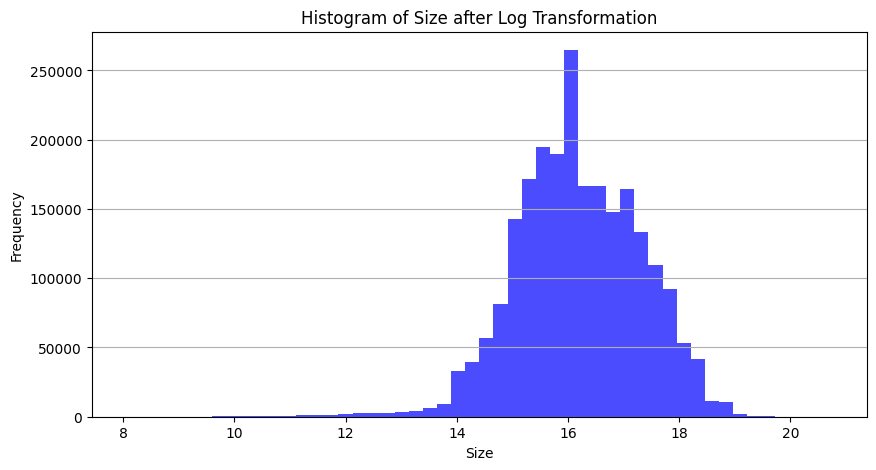

In [7]:
# Apply log transformation to Rating Count and Size
google_playstore_df['Rating Count'] = google_playstore_df['Rating Count'].apply(lambda x: np.log1p(x))  # log1p to handle zero values
google_playstore_df['Size'] = google_playstore_df['Size'].apply(lambda x: np.log1p(x))

# Plot histograms after log transformation
columns_to_plot = ['Rating Count', 'Size']

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(google_playstore_df[col], bins=50, alpha=0.7, color='blue')
    plt.title(f'Histogram of {col} after Log Transformation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

**Observations After Log Transformation:**

**Rating Count:** Although the distribution is still somewhat skewed, the logarithmic transformation has made the data less extreme, with most values now between 0 and 4.
We could still consider treating the zero values as missing or outliers, depending on their significance.

**Size:** The log transformation significantly improved the distribution of the Size feature. The distribution is now more centered, which will be beneficial for modeling.

## 3.3 Generating Heatmap

After the outliers are handled, we generate a heatmap in order to see the relationship between all of the numerical features.

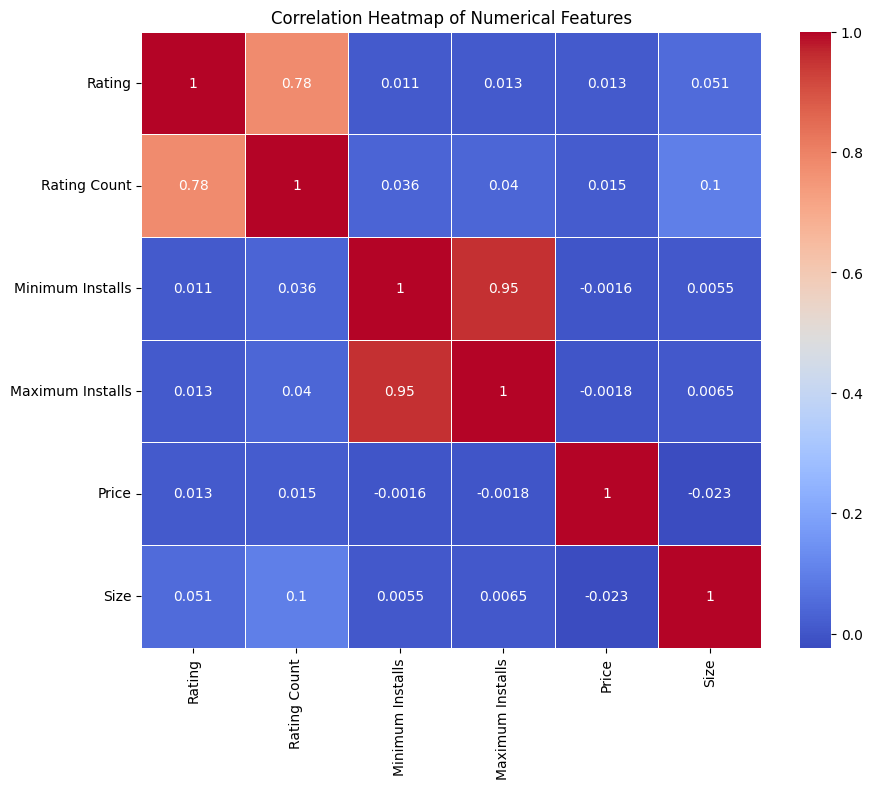

In [ ]:
# Select only numerical columns for the correlation heatmap
numerical_features = google_playstore_df.select_dtypes(include=['float64', 'int64'])

# Generate correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observations from Correlation Heatmap:**

**Rating and Rating Count:**

There is a strong positive correlation (0.78) between Rating and Rating Count. This suggests that apps with more ratings tend to have higher ratings, which might make sense given that more popular apps are often rated higher. One interpretation is that apps with more engagement often have established credibility, leading to generally positive user feedback or, more simply, well-received apps attract more users to leave ratings.


**Minimum Installs and Maximum Installs:**

There is a very high correlation (0.95) between Minimum Installs and Maximum Installs. This indicates that these two features are likely redundant and might not add much unique information to the model.
We should consider dropping one of these features to avoid multicollinearity during modeling.

**Size:**

The Size feature has weak correlations with other features. This means it likely captures unique information and should be kept as is for modeling.

**Price:**

Price has very low correlations with other features, suggesting it also captures unique information not captured by other features.

In [ ]:
# Drop the redundant feature 'Minimum Installs'
google_playstore_df.drop('Minimum Installs', axis=1, inplace=True)

## 3.4 Analyzing Categorical Feature Distribution

In this section, we analyze the distribution of categorical features to understand how non-numerical variables are represented in the dataset. Categorical features often reveal trends and patterns that complement insights from numerical features, helping us better understand user behavior and app characteristics.

We first consolidates some of the categories to simplify the analysis and improve interpretability. Rare categories like 'Adults only 18+' and 'Unrated' in 'Content Rating' are grouped into 'Others' to avoid sparsity and ensure these infrequent categories do not skew the analysis. Similarly, consolidating older Android versions into a generic 'Older Versions' group reduces complexity and focuses on broader trends rather than specific, outdated versions, making the data easier to analyze and visualize.

In [ ]:
# Consolidate rare categories in 'Content Rating'
google_playstore_df['Content Rating'] = google_playstore_df['Content Rating'].replace(
    ['Adults only 18+', 'Unrated'], 'Others'
)

# Consolidate older Android versions into a generic 'Older Versions' group
google_playstore_df['Minimum Android'] = google_playstore_df['Minimum Android'].apply(
    lambda x: 'Older Versions' if '1.' in x or '2.' in x or 'Varies with device' in x else x
)

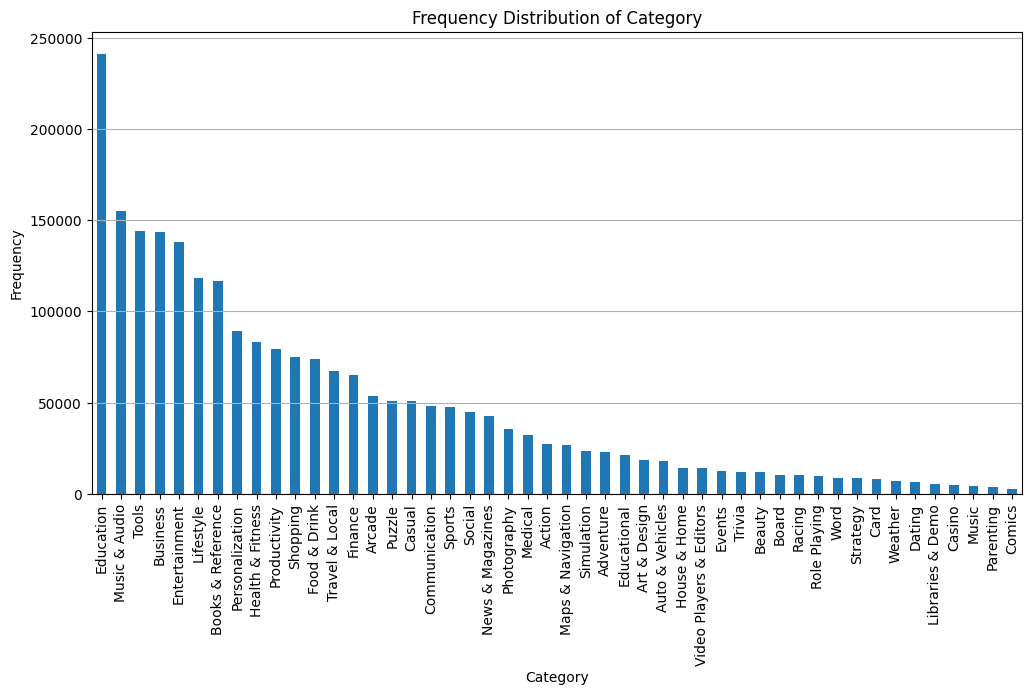

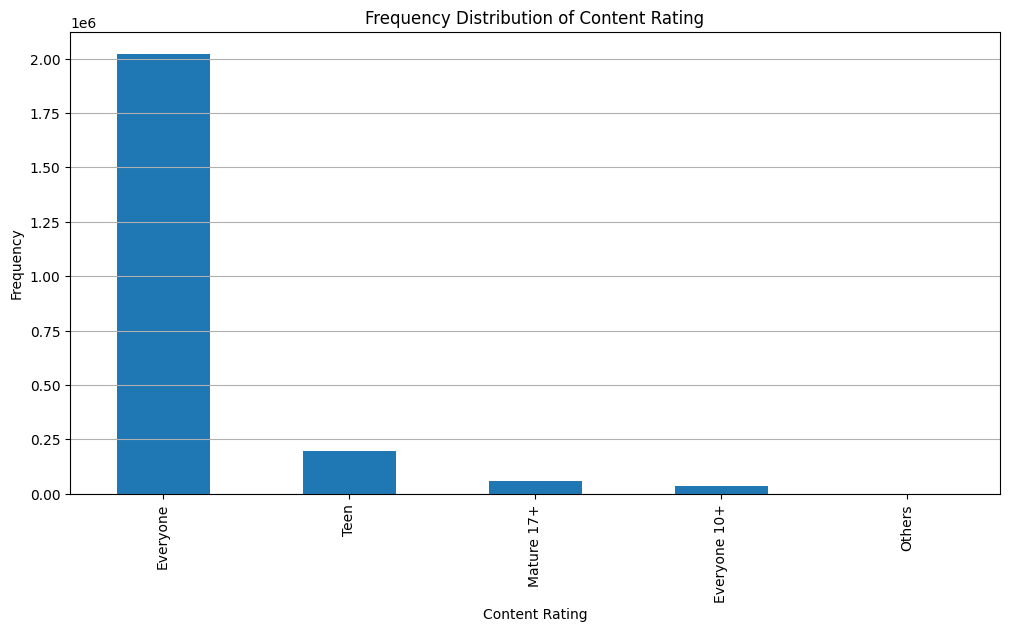

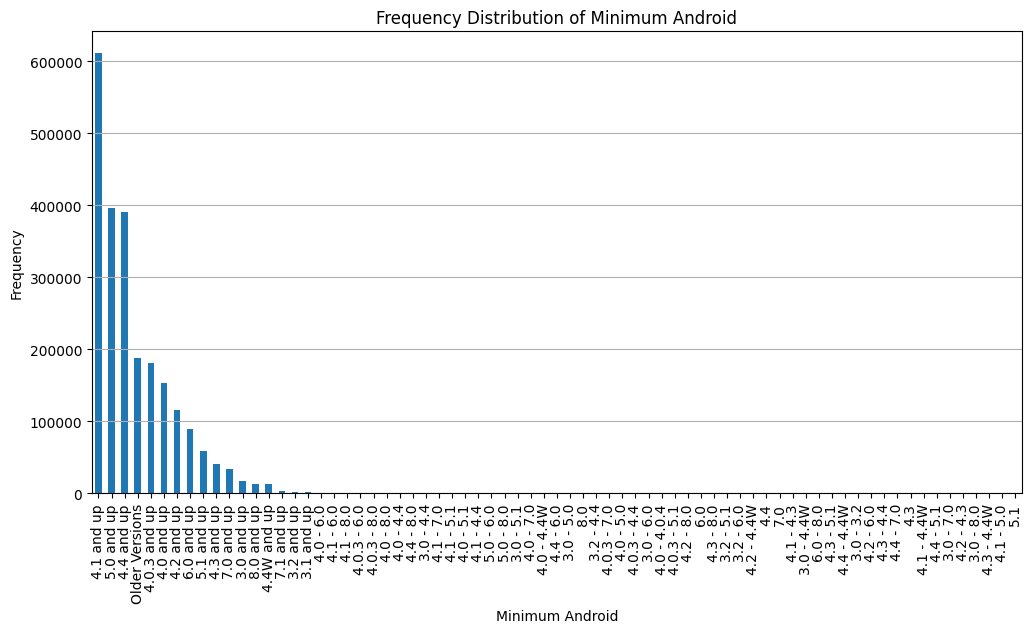

In [ ]:
# Analyze the frequency distribution of categorical features
categorical_features = ['Category', 'Content Rating', 'Minimum Android']

for col in categorical_features:
    plt.figure(figsize=(12, 6))
    google_playstore_df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

Observations from Categorical Frequency Distributions:

**Category:**

The most common categories are Education, Music, and Audio, indicating a high concentration of apps in these segments.
Categories like Libraries & Demo, Comics, and Parenting have fewer apps. This disparity might affect the model’s ability to generalize across underrepresented categories.

**Content Rating:**

A large majority of apps are rated Everyone, followed by Teen and Mature 17+. Categories like Adults only 18+ and Unrated are very sparse.
During modeling, we may consider grouping some categories if there are too few examples for certain content ratings.

**Minimum Android:**

The Minimum Android feature shows a large number of distinct values, with many entries like "Varies with device" and versions ranging from very old to the latest.
We might consider grouping similar Android versions or dealing with "Varies with device" values by imputing or creating a separate category.

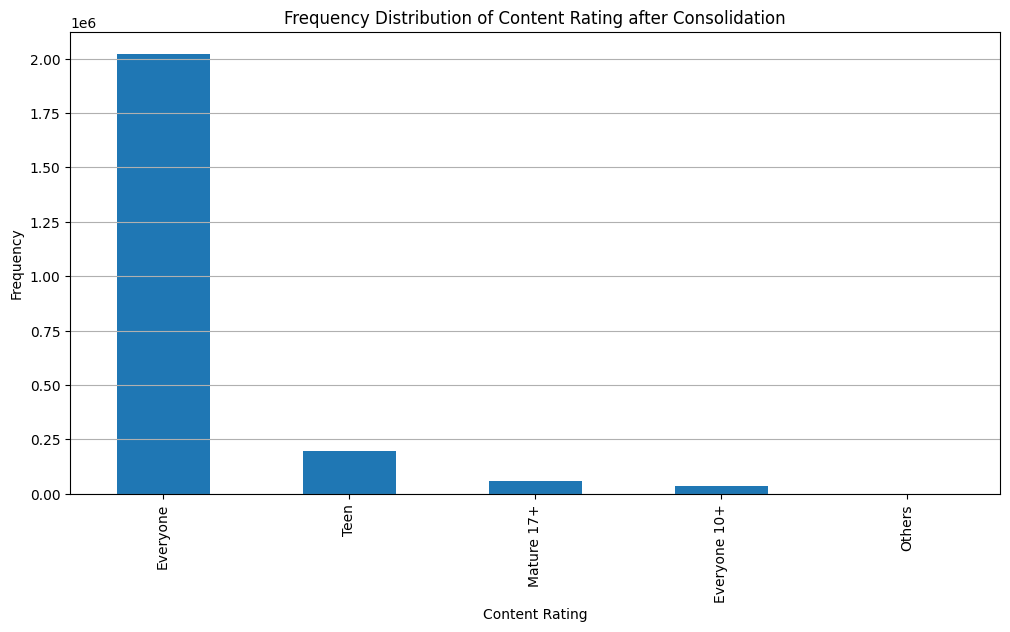

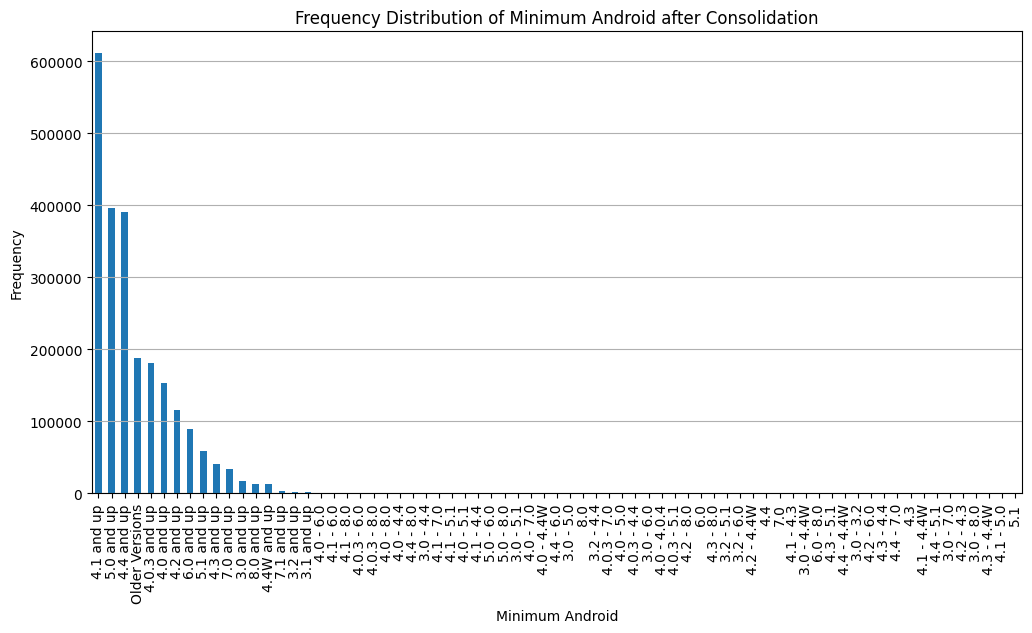

In [ ]:
# Verify the changes with new frequency plots
categorical_features = ['Content Rating', 'Minimum Android']
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    google_playstore_df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col} after Consolidation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()



Observations After Consolidation:
Content Rating:

The underrepresented categories (Adults only 18+ and Unrated) have been consolidated into Others, making the distribution more balanced. This will help in avoiding overfitting and ensuring better generalization during modeling.
Minimum Android:

Older Android versions and "Varies with device" values have been grouped under Older Versions. The overall distribution is now clearer, with distinct Android versions being more visible.
The Older Versions category has a high frequency, indicating that many apps are compatible with older Android versions.

## 3.5 Analyzing Feature Distributions by Category and Monetization Type

This section includes plots that visualize the distribution of key features like installs, ratings, and rating counts across different app categories, as well as comparisons between free/paid apps, ad-supported apps, and those with in-app purchases.


In this step, we calculate the distribution of app categories and group them based on their cumulative frequency, keeping only the top categories that make up 90% of the total count. Categories with lower frequencies are grouped into an "Others" category. This helps reduce the complexity of the analysis by focusing on the most prevalent categories. We also create a new filtered dataset, convert installs to numerical data & log-transform it for better visualization. We then update the category column with the new grouped categories for further analysis.

In [ ]:
# Get Category value counts
cat_df = google_playstore_df['Category'].value_counts().reset_index()

# Calculate the total sum of counts
total_count = cat_df["count"].sum()

# Calculate the cumulative sum and cumulative percentage
cat_df["Cumulative Count"] = cat_df["count"].cumsum()
cat_df["Cumulative Percentage"] = (cat_df["Cumulative Count"] / total_count) * 100

# Define the threshold for grouping as "Others"
threshold_percentage = 90

# Identify the categories that fall under the top percentage
top_categories = cat_df[cat_df["Cumulative Percentage"] <= threshold_percentage]["Category"]

# Create a new column for grouped categories
cat_df["Grouped Category"] = cat_df["Category"].apply(lambda x: x if x in top_categories.values else "Others")

# Create a mapping dictionary from original categories to grouped categories
category_mapping = dict(zip(cat_df["Category"], cat_df["Grouped Category"]))

# Create a new filtered df for further EDA analysis
filters = ['Category', 'Rating', 'Rating Count', 'Installs', 'Free', 'Last Updated', 'Ad Supported', 'In App Purchases']
filtered_df = google_playstore_df[filters].copy()

# Change dtype to the appropriate ones
filtered_df['Last Updated Year'] = pd.to_datetime(filtered_df['Last Updated'], format='%b %d, %Y').dt.year
filtered_df['Installs'] = filtered_df['Installs'].map(lambda x: int(x[:-1].replace(',', '')))

# Log transform installs
filtered_df['Installs'] = filtered_df['Installs'].apply(lambda x: np.log1p(x))

# Update the category with categories in the top percentage + others
filtered_df['Category'] = filtered_df['Category'].map(category_mapping)

display(filtered_df.head())

,Category,Rating,Rating Count,Installs,Free,Last Updated,Ad Supported,In App Purchases,Last Updated Year
0,Others,0.0,0.000000,2.397895,True,"Feb 26, 2020",False,False,2020
1,Tools,4.4,4.174387,8.517393,True,"May 06, 2021",True,False,2021
2,Productivity,0.0,0.000000,3.931826,True,"Aug 19, 2019",False,False,2019
3,Communication,5.0,1.791759,2.397895,True,"Oct 13, 2018",True,False,2018
4,Tools,0.0,0.000000,4.615121,True,"Nov 12, 2018",False,False,2018


<ipython-input-42-ca36100c37fe>:9: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


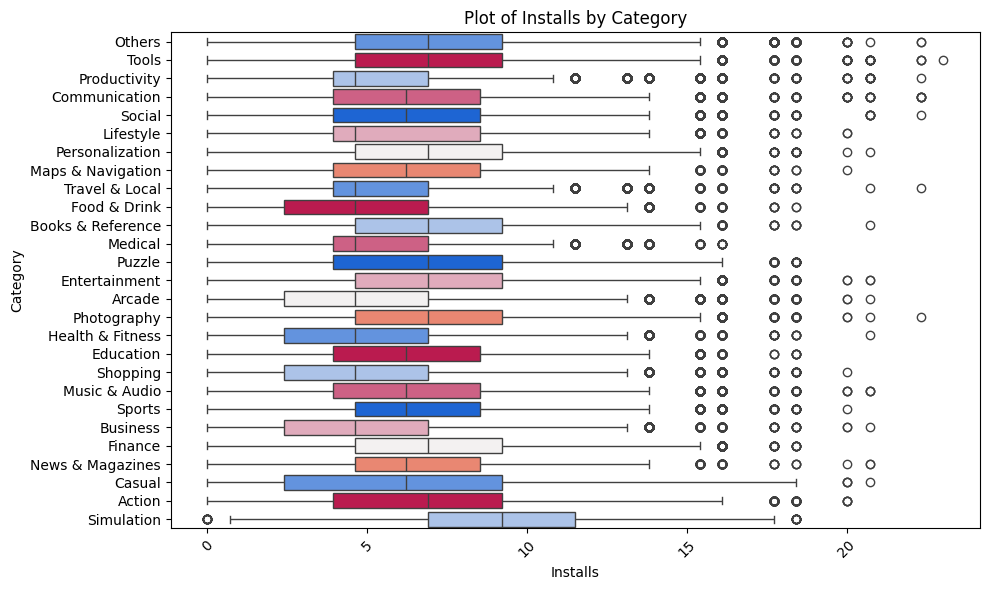

In [ ]:
# Set custom palette
cust_color = sns.diverging_palette(260, 5, l=45, s=100, n=7, sep=1).as_hex()
cust_id = [1, -1, 2, -2, 0, -3, 3]
cust_color = [cust_color[id] for id in cust_id]
cust_color.append('#fd7a5e')

# Plot installs by the new categories
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Installs",
    y="Category",
    data=filtered_df,
    orient="h",
    palette=sns.color_palette(cust_color),
    hue='Category'
)
plt.title("Plot of Installs by Category")
plt.xlabel("Installs")
plt.xticks(rotation=45)
plt.ylabel("Category")
plt.tight_layout()

# Show plot
plt.show()

This plot helps us understand how app installs are distributed across different categories, providing insights into which categories are more popular and engage more users.

**Observations:**

1. **High Median Installs**:  
   Categories like **Simulation** and **Action** have the highest median installs, indicating greater overall popularity and user engagement compared to other categories.

2. **Wide Distribution**:  
   Categories such as **Casual**, **Puzzle**, and **Action** have the widest ranges of install counts, reflecting a mix of highly popular apps and less downloaded ones.

3. **Consistent Install Counts**:  
   Categories like **Medical**, **Travel & Local**, and **Productivity** have smaller ranges, suggesting more uniform engagement levels within these categories.

4. **Low Median Installs**:  
   Categories like **Food & Drink**, **Health & Fitness**, and **Business** generally have lower median installs, which may indicate smaller target audiences or less user engagement.

5. **Balanced Performance**:  
   Categories such as **Books & Reference**, **Finance**, and **Entertainment** show moderate ranges and install counts, reflecting consistent performance with occasional standout apps.

**General Insights**

- **High Outlier Counts**:  
  Categories with many outliers (e.g., **Travel & Local**) are often dominated by a few highly successful apps, which skew the overall performance metrics.

- **Wide Ranges in Popularity**:  
  Categories with large IQR values, such as **Casual** and **Puzzle**, indicate varying levels of success among apps, making these categories competitive and diverse.

This analysis reveals that the app install trends vary widely across categories, reflecting differences in user behavior, app offerings, and market dynamics.



<ipython-input-14-57e6b702943e>:3: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


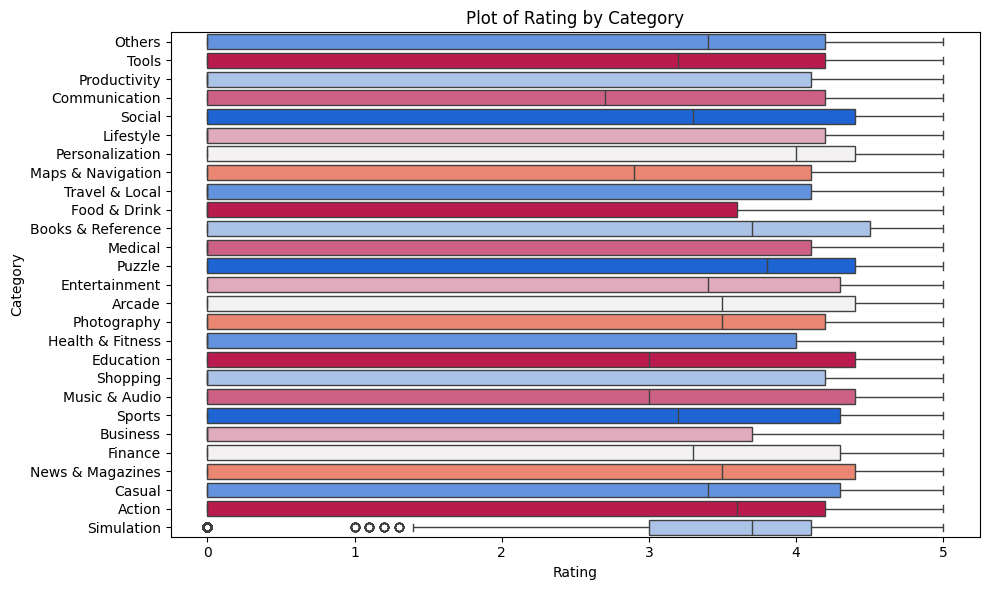

In [ ]:
# Plot rating by the new categories
plt.figure(figsize=(10, 6))
sns.boxplot(
    y="Category",
    x="Rating",
    data=filtered_df,
    orient="h",
    palette=sns.color_palette(cust_color),
    hue="Category"
)
plt.title("Plot of Rating by Category")
plt.ylabel("Category")
plt.xlabel("Rating")
plt.tight_layout()

# Show plot
plt.show()

By plotting ratings across categories, we can explore whether certain categories tend to receive higher or lower ratings, helping identify patterns or trends in user feedback.

**Observations:**

1. **High Median Ratings**:  
   Categories like **Books & Reference**, **Puzzle**, and **Personalization** have higher median ratings, suggesting strong user satisfaction and engagement within these categories.  

2. **Wide Rating Distribution**:  
   Categories such as **Education**, **Music & Audio**, and **Social** show the widest interquartile ranges (IQR), indicating that apps within these categories have varying levels of user satisfaction, from low to very high ratings.  

3. **Consistent Ratings**:  
   Categories like **Simulation** have smaller IQRs, reflecting more consistent user ratings, suggesting that apps in these categories tend to perform at similar levels.  

4. **Low Median Ratings**:  
   Categories such as **Food & Drink**, **Health & Fitness**, and **Travel & Local** have lower median ratings, indicating potential areas for improvement in app quality or user experience.  

5. **Balanced Performance**:  
   Categories such as **Finance**, **Casual**, and **Tools** show moderate median ratings and IQRs, reflecting a balance of app performance and user satisfaction.  

**General Insights:**

The analysis highlights significant variations in app ratings across categories. Categories with high median ratings and consistent distributions indicate strong user satisfaction, while those with low ratings or wide distributions may require focused improvements to enhance user experiences. This information can guide developers and marketers in identifying opportunities for improvement and creating targeted strategies to address user needs.

<ipython-input-15-6329c38abb1c>:3: UserWarning: 
The palette list has fewer values (8) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


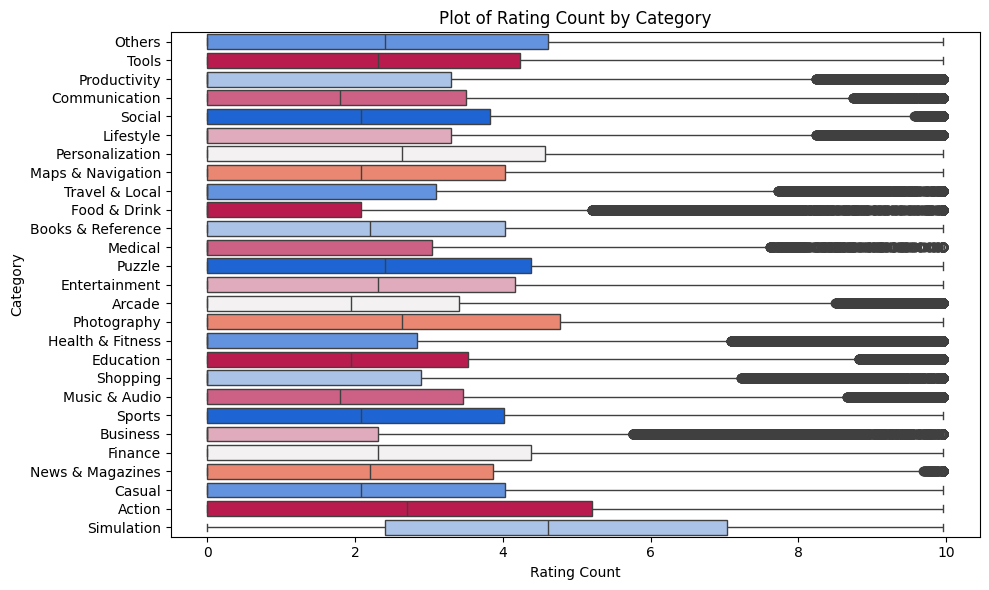

In [ ]:
# Plot rating count by the new categories
plt.figure(figsize=(10, 6))
sns.boxplot(
    y="Category",
    x="Rating Count",
    data=filtered_df,
    orient="h",
    palette=sns.color_palette(cust_color),
    hue="Category"
)
plt.title("Plot of Rating Count by Category")
plt.ylabel("Category")
plt.xlabel("Rating Count")
plt.tight_layout()

# Show plot
plt.show()

This plot helps us understand how the number of ratings (rating count) is distributed across different categories, providing insights into user engagement and app popularity. By comparing this plot to the previous rating plot, we can analyze how user ratings align with the number of reviews apps receive.

**Observations:**

1. **High Median Rating Counts**:  
   Categories such as **Simulation**, **Tools**, and **Puzzle** have higher median rating counts, suggesting strong user engagement and popularity in these app categories.

2. **Wide Distribution**:  
   Categories like **Arcade**, **Communication**, and **Education** show wide interquartile ranges (IQR), reflecting varying levels of user feedback and engagement, with both highly popular apps and those with limited user ratings.

3. **Consistent Rating Counts**:  
   Categories such as **Business**, **Food & Drink**, and **Medical** have smaller IQRs, indicating more uniform levels of user feedback across apps in these categories.

4. **Low Median Rating Counts**:  
   Categories like **Health & Fitness**, **Shopping**, and **Travel & Local** have lower median rating counts, which may point to lower user engagement or a smaller audience base for these apps.

5. **Balanced Performance**:  
   Categories like **Social**, **Entertainment**, and **Finance** exhibit moderate median rating counts and IQRs, indicating a balanced performance in terms of user feedback and engagement.

**General Insights:**

The relationship between user ratings and rating counts provides a comprehensive view of user engagement. Categories like **Simulation** and **Tools** not only have high median rating counts but also strong user satisfaction based on their ratings, showcasing their popularity and quality. On the other hand, categories such as **Health & Fitness** and **Shopping**, which have lower rating counts, align with their relatively low median ratings, indicating areas for improvement.

Categories with wide distributions in both metrics, such as **Arcade** and **Education**, suggest varying app quality and popularity, reflecting a mix of standout apps and those that need enhancement.

<ipython-input-16-245904eb19ba>:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.catplot(


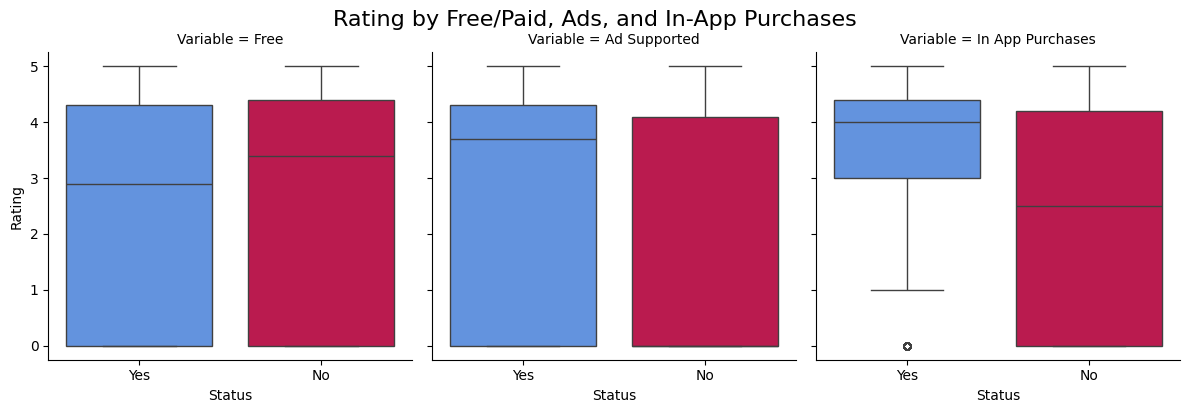

In [ ]:
# Melt the DataFrame to long format
paid_features = ['Free', 'Ad Supported', 'In App Purchases', 'Rating']
paid_df = filtered_df[paid_features].copy()

melted_df = paid_df.melt(id_vars='Rating', var_name='Variable', value_name='Status')
melted_df['Status'] = melted_df['Status'].map({True: 'Yes', False: 'No'})

g = sns.catplot(
    data=melted_df,
    x='Status',
    y='Rating',
    col='Variable',
    kind='box',
    palette=sns.color_palette(cust_color),
    hue='Status',
    height=4, aspect=1
)

# Customize plot
plt.tight_layout()
g.fig.suptitle("Rating by Free/Paid, Ads, and In-App Purchases", y=1.02, fontsize=16)

# Show plot
plt.show()

This plot compares app ratings based on whether the apps are free or paid, ad-supported, or include in-app purchases. It provides insights into how these monetization features influence user satisfaction.

**Observations:**

1. **Free vs. Paid Apps**:  
   Paid apps have slightly higher median ratings compared to free apps, indicating that users may perceive paid apps as higher quality or more reliable.

2. **Ad-Supported Apps**:  
   Ad-supported apps show similar median ratings to apps without ads, suggesting that the presence of ads may not strongly influence overall user satisfaction.

3. **In-App Purchases**:  
   Apps with in-app purchases tend to have higher median ratings and a narrower interquartile range, indicating more consistent positive feedback compared to apps without in-app purchases.

This analysis highlights how monetization strategies such as pricing, ads, and in-app purchases impact user satisfaction, providing valuable insights for app developers and marketers.


<ipython-input-39-862ffc397f0a>:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  g = sns.catplot(


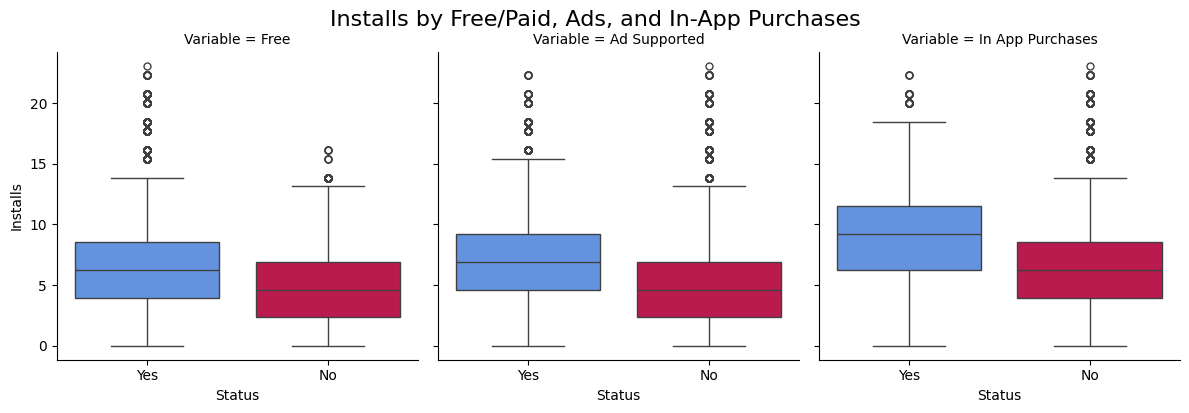

In [ ]:
# Melt the DataFrame to long format
paid_features = ['Free', 'Ad Supported', 'In App Purchases', 'Installs']
paid_df = filtered_df[paid_features].copy()

melted_df = paid_df.melt(id_vars='Installs', var_name='Variable', value_name='Status')
melted_df['Status'] = melted_df['Status'].map({True: 'Yes', False: 'No'})

g = sns.catplot(
    data=melted_df,
    x='Status',
    y='Installs',
    col='Variable',
    kind='box',
    palette=sns.color_palette(cust_color),
    hue='Status',
    height=4, aspect=1
)

# Customize plot
plt.tight_layout()
g.fig.suptitle("Installs by Free/Paid, Ads, and In-App Purchases", y=1.02, fontsize=16)

# Show plot
plt.show()

This plot compares app install counts based on whether the apps are free or paid, ad-supported, or include in-app purchases. It provides insights into how these monetization strategies influence user downloads.

**Observations:**

1. **Free vs. Paid Apps**:  
   Free apps have significantly higher median install counts compared to paid apps, indicating that users are more likely to download free apps than those requiring payment.

2. **Ad-Supported Apps**:  
   Ad-supported apps show slightly higher median install counts compared to non-ad-supported apps, suggesting that the presence of ads may not deter users from downloading these apps.

3. **In-App Purchases**:  
   Apps with in-app purchases have a slightly higher median number of installs compared to apps without in-app purchases, showing that users are still willing to download apps with optional paid features.

This analysis highlights how different monetization strategies impact user downloads, offering valuable insights into user preferences and behavior.


## 3.6 Comparison of Category Performance and Frequency


The comparison of installs, ratings, and rating counts with the frequency of categories reveals interesting trends and unique occurrences. Categories like Education and Music & Audio, which have the highest frequencies, generally exhibit moderate values in installs, ratings, and rating counts, suggesting broad but not necessarily deep engagement across their apps. On the other hand, Simulation, despite having one of the lowest frequencies, stands out with very high median values in installs, ratings, and rating counts. This indicates that while fewer apps exist in this category, they tend to perform exceptionally well in terms of user engagement and satisfaction. Conversely, categories like Business and Food & Drink, which also have relatively high frequencies, show lower medians in ratings and rating counts, suggesting a more variable or niche appeal. These unique occurrences highlight the diversity within categories, where the volume of apps does not always correlate directly with their popularity or user satisfaction. This analysis emphasizes the importance of considering both qualitative performance metrics and quantitative category sizes when evaluating app success.

# Part 4: Hypothesis Testing

In this section, we conduct statistical tests to validate assumptions and explore relationships between key variables in the dataset. This helps us derive meaningful insights and support data-driven conclusions for further analysis.

## 4.1 Rating Count Across Categories - ANOVA

For the first test, we aim to determine whether there is a significant difference in average ratings between free and paid apps. By splitting the dataset into free and paid apps based on the Price feature, we perform an independent t-test to compare their mean ratings. This analysis helps us assess if app pricing influences user satisfaction. The results are interpreted using a significance level of 0.05.

In [ ]:
# Split data into free and paid apps
free_apps = google_playstore_df[google_playstore_df['Price'] == 0]['Rating']
paid_apps = google_playstore_df[google_playstore_df['Price'] > 0]['Rating']

# Perform a t-test
t_stat, p_value = ttest_ind(free_apps.dropna(), paid_apps.dropna())

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the average ratings of free and paid apps.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the average ratings of free and paid apps.")


T-statistic: -15.796485939274586, P-value: 3.311886495319206e-56
Reject the null hypothesis: There is a significant difference between the average ratings of free and paid apps.


Insights from Hypothesis Testing:
Practical Interpretation: The significant difference in average ratings suggests that users rate free and paid apps differently, and this distinction could be a critical factor during the modeling phase. For example, we might consider adding features related to Price during feature engineering to capture this influence.

## 4.2 Testing Differences in Rating Counts Across Categories

In this test, we use ANOVA (Analysis of Variance) to determine whether there are significant differences in the average rating counts among different app categories. By grouping the data based on categories and analyzing the Rating Count feature, this test helps us assess whether user engagement (as measured by the number of ratings) varies meaningfully across app categories. The results are interpreted using a significance level of 0.05.

In [8]:
# Prepare data for ANOVA
categories = google_playstore_df['Category'].unique()
category_data = [google_playstore_df[google_playstore_df['Category'] == category]['Rating Count'].dropna() for category in categories]

# Perform ANOVA
f_stat, p_value = f_oneway(*category_data)

# Display the results
print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Rating Count across categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Rating Count across categories.")


F-statistic: 3535.170681778092, P-value: 0.0
Reject the null hypothesis: There is a significant difference in Rating Count across categories.


**Conclusion:** Reject the null hypothesis. There is a significant difference in average Rating Count across different app Categories. This suggests that user engagement varies substantially across categories, which is an important insight for modeling.

## 4.3 Association Between Content Rating and Free/Paid - Chi-Square Test

In the third test, we use the Chi-Square Test of Independence to evaluate whether there is a significant association between the Content Rating (e.g., Everyone, Teen, Mature) and whether an app is free or paid. A contingency table is created to compare the distribution of Content Rating across free and paid apps. This test helps determine if the pricing structure of an app is related to its target audience, as indicated by its content rating. The results are interpreted using a significance level of 0.05.

In [ ]:
# Create a contingency table for Content Rating vs. Free/Paid
contingency_table = pd.crosstab(google_playstore_df['Content Rating'], google_playstore_df['Free'])

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi2 Statistic: {chi2_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Content Rating and Free/Paid.")
else:
    print("Fail to reject the null hypothesis: No significant association between Content Rating and Free/Paid.")


Chi2 Statistic: 1792.3338545286726, P-value: 0.0
Reject the null hypothesis: There is a significant association between Content Rating and Free/Paid.


**Conclusion:** Reject the null hypothesis. There is a significant association between Content Rating and whether an app is Free or Paid. This means content targeting (e.g., apps for different age groups) is related to whether an app charges users, which can be factored into future analysis and model design.

## 4.4 Permutation Test for Robust Analysis

This test evaluates whether the observed difference in mean Rating Count between categories is statistically significant or could have occurred by random chance. The permutation test reshuffles the data multiple times to create a distribution of mean differences under the null hypothesis. By comparing the observed difference to this distribution, we determine whether the observed difference is significant, providing a robust alternative for validating the differences across categories.

In [ ]:
# Permutation test for Rating Count across categories
observed_mean_diff = google_playstore_df.groupby('Category')['Rating Count'].mean().max() - google_playstore_df.groupby('Category')['Rating Count'].mean().min()
iterations = 1000
mean_diffs = []

# Run permutation test
for _ in range(iterations):
    permuted_data = google_playstore_df['Rating Count'].sample(frac=1, replace=False).reset_index(drop=True)
    permuted_mean_diff = permuted_data.groupby(google_playstore_df['Category']).mean().max() - permuted_data.groupby(google_playstore_df['Category']).mean().min()
    mean_diffs.append(permuted_mean_diff)

# Calculate p-value
p_value_perm = np.sum(np.array(mean_diffs) >= observed_mean_diff) / iterations

print(f"Observed Mean Difference: {observed_mean_diff}")
print(f"P-value from Permutation Test: {p_value_perm}")

# Interpretation
if p_value_perm < 0.05:
    print("Reject the null hypothesis: The difference in Rating Count across categories is significant (based on permutation test).")
else:
    print("Fail to reject the null hypothesis: The difference in Rating Count across categories is not significant (based on permutation test).")


Observed Mean Difference: 4.090084699932746
P-value from Permutation Test: 0.0
Reject the null hypothesis: The difference in Rating Count across categories is significant (based on permutation test).


**Conclusion:** Reject the null hypothesis. The permutation test further supports that there is a significant difference in Rating Count across categories, reinforcing the reliability of the ANOVA result.

Key Insights:
There is a significant difference in both Rating and Rating Count across app categories and types (free/paid).
Content Rating is also significantly associated with whether an app is free or paid. This association may imply different monetization strategies based on target age groups.

## 4.5 Encoding Categorical Variables for Statistical Testing

In this step, we perform one-hot encoding on the categorical features (Category, Content Rating, and Minimum Android) to convert them into numerical representations suitable for statistical testing and modeling. This transformation allows us to isolate specific categories (e.g., Category_Music) and analyze their relationships with other variables through tests such as t-tests and Chi-Square tests.

In [9]:
# Perform One-Hot Encoding on 'Category', 'Content Rating', and 'Minimum Android'
encoded_df = pd.get_dummies(google_playstore_df, columns=['Category', 'Content Rating', 'Minimum Android'], drop_first=True)

# Display the first few rows of the encoded DataFrame
encoded_df.head()

,App Name,App Id,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Developer Id,Developer Email,Last Updated,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,Category_Board,Category_Books & Reference,Category_Business,Category_Card,Category_Casino,Category_Casual,Category_Comics,Category_Communication,Category_Dating,Category_Education,Category_Educational,Category_Entertainment,Category_Events,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_House & Home,Category_Libraries & Demo,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_Music & Audio,Category_News & Magazines,Category_Parenting,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Shopping,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Minimum Android_1.0 and up,Minimum Android_1.1 - 4.4,Minimum Android_1.1 and up,Minimum Android_1.5 - 2.1,Minimum Android_1.5 - 3.2,Minimum Android_1.5 and up,Minimum Android_1.6 - 2.1,Minimum Android_1.6 - 4.0.2,Minimum Android_1.6 - 4.0.4,Minimum Android_1.6 - 4.2.2,Minimum Android_1.6 - 4.4,Minimum Android_1.6 - 4.4W,Minimum Android_1.6 - 5.1,Minimum Android_1.6 - 7.0,Minimum Android_1.6 - 7.1.1,Minimum Android_1.6 and up,Minimum Android_2.0 - 2.3.4,Minimum Android_2.0 - 8.0,Minimum Android_2.0 and up,Minimum Android_2.0.1 and up,Minimum Android_2.1 - 2.3.4,Minimum Android_2.1 - 3.1,Minimum Android_2.1 - 3.2,Minimum Android_2.1 - 4.1.1,Minimum Android_2.1 - 4.4,Minimum Android_2.1 - 4.4W,Minimum Android_2.1 - 5.0,Minimum Android_2.1 - 5.1,Minimum Android_2.1 - 6.0,Minimum Android_2.1 - 7.1.1,Minimum Android_2.1 and up,Minimum Android_2.2,Minimum Android_2.2 - 2.3.4,Minimum Android_2.2 - 3.0,Minimum Android_2.2 - 3.2,Minimum Android_2.2 - 4.0.4,Minimum Android_2.2 - 4.1.1,Minimum Android_2.2 - 4.2.2,Minimum Android_2.2 - 4.3,Minimum Android_2.2 - 4.4,Minimum Android_2.2 - 4.4W,Minimum Android_2.2 - 5.0,Minimum Android_2.2 - 5.1,Minimum Android_2.2 - 6.0,Minimum Android_2.2 - 8.0,Minimum Android_2.2 and up,Minimum Android_2.3 - 3.2,Minimum Android_2.3 - 4.0.2,Minimum Android_2.3 - 4.1.1,Minimum Android_2.3 - 4.4,Minimum Android_2.3 - 4.4W,Minimum Android_2.3 - 5.0,Minimum Android_2.3 - 5.1,Minimum Android_2.3 - 6.0,Minimum Android_2.3 - 7.0,Minimum Android_2.3 - 7.1.1,Minimum Android_2.3 - 8.0,Minimum Android_2.3 and up,Minimum Android_2.3.3 - 2.3.4,Minimum Android_2.3.3 - 4.0.4,Minimum Android_2.3.3 - 4.4,Minimum Android_2.3.3 - 4.4W,Minimum Android_2.3.3 - 5.0,Minimum Android_2.3.3 - 5.1,Minimum Android_2.3.3 - 6.0,Minimum Android_2.3.3 - 7.1.1,Minimum Android_2.3.3 - 8.0,Minimum Android_2.3.3 and up,Minimum Android_3.0 - 3.2,Minimum Android_3.0 - 4.1.1,Minimum Android_3.0 - 4.4,Minimum Android_3.0 - 4.4W,Minimum Android_3.0 - 5.0,Minimum Android_3.0 - 5.1,Minimum Android_3.0 - 6.0,Minimum Android_3.0 - 7.0,Minimum Android_3.0 - 7.1.1,Minimum Android_3.0 - 8.0,Minimum Android_3.0 and up,Minimum Android_3.1 and up,Minimum Android_3.2 - 4.1.1,Minimum Android_3.2 - 4.4,Minimum Android_3.2 - 5.1,Minimum Android_3.2 - 6.0,Minimum Android_3.2 - 7.1.1,Minimum Android_3.2 and up,Minimum Android_4.0 - 4.0.4,Minimum Android_4.0 - 4.4,Minimum Android_4.0 - 4.4W,Minimum Android_4.0 - 5.0,Minimum Android_4.0 - 5.1,Minimum Android_4.0 - 6.0,Minimum Android_4.0 - 7.0,Minimum Android_4.0 - 7.1.1,Minimum Android_4.0 - 8.0,Minimum Android_4.0 and up,Minimum Android_4.0.3 - 4.2.2,Minimum Android_4.0.3 - 4.4,Minimum Android_4.0.3 - 5.1,Minimum Android_4.0.3 - 6.0,Minimum Android_4.0.3 - 7.0,Minimum Android_4.0.3 - 7

## 4.6 T-Test for Ratings in Music Apps vs. Other Categories

In this test, we compare the average ratings of apps in the Music category with those of all other categories using an independent t-test. This analysis helps determine whether Music apps are rated significantly differently than apps in other categories. By isolating Music apps using one-hot encoded data, we ensure precise grouping for the comparison. The results are evaluated at a significance level of 0.05.

In [ ]:
# Extract ratings for Music apps vs. other categories
music_ratings = encoded_df[encoded_df['Category_Music'] == 1]['Rating']
other_ratings = encoded_df[encoded_df['Category_Music'] == 0]['Rating']

# Perform a t-test for difference in ratings between Music category and others
t_stat, p_value = ttest_ind(music_ratings.dropna(), other_ratings.dropna())

# Display the results
print(f"T-statistic for Music vs. Others Rating: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in ratings for Music apps compared to other categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ratings for Music apps compared to other categories.")


T-statistic for Music vs. Others Rating: 14.086128675075418, P-value: 4.642054906520539e-45
Reject the null hypothesis: There is a significant difference in ratings for Music apps compared to other categories.


**Conclusion:** We reject the null hypothesis, indicating a significant difference in ratings between Music apps and other categories. This means that the average ratings for apps in the Music category are significantly different compared to apps in other categories, which could be valuable information for feature engineering.

## 4.7 Chi-Square Test for Association Between Content Rating (Everyone) and Free/Paid

This test evaluates whether there is a significant association between apps rated for Everyone and their pricing model (Free or Paid) using the Chi-Square Test of Independence. By creating a contingency table of Content Rating_Everyone 10+ and Free, we analyze whether the distribution of free and paid apps is influenced by the content rating.

In [10]:
# Create a contingency table for Content Rating (Everyone) vs. Free/Paid
contingency_table = pd.crosstab(encoded_df['Content Rating_Everyone 10+'], encoded_df['Free'])

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print(f"Chi2 Statistic for Content Rating_Everyone vs. Free/Paid: {chi2_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Content Rating (Everyone) and whether an app is Free or Paid.")
else:
    print("Fail to reject the null hypothesis: No significant association between Content Rating (Everyone) and whether an app is Free or Paid.")


Chi2 Statistic for Content Rating_Everyone vs. Free/Paid: 1071.5044656691512, P-value: 5.155850428134219e-235
Reject the null hypothesis: There is a significant association between Content Rating (Everyone) and whether an app is Free or Paid.


**Conclusion:** We reject the null hypothesis, indicating a significant association between apps that are rated Content Rating_Everyone and their Free/Paid status. This implies that content targeting is related to whether an app charges users, suggesting that specific content ratings are more or less likely to be found among free apps.

## 4.8 Bootstrap Confidence Interval for Music Category Ratings

This analysis estimates the confidence interval for the average rating of Music apps using the bootstrap method. Bootstrapping is a non-parametric approach that repeatedly resamples the data to generate a distribution of sample means. This method provides a robust estimate of the confidence interval, even when the data does not follow a normal distribution. By applying this technique to the ratings of Music apps, we gain a clearer understanding of the range within which their true mean rating likely falls. The confidence interval is calculated at a specified confidence level (e.g., 95%).

In [ ]:
# Function to calculate bootstrap confidence interval
def bootstrap_confidence_interval(data, n_iterations=1000, ci_percentile=95):
    sample_means = []
    n_size = len(data)
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=n_size, replace=True)
        sample_means.append(np.mean(sample))
    lower_bound = np.percentile(sample_means, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(sample_means, 100 - (100 - ci_percentile) / 2)
    return lower_bound, upper_bound

# Bootstrapping confidence interval for Music category ratings
music_ratings_clean = music_ratings.dropna()
ci_lower, ci_upper = bootstrap_confidence_interval(music_ratings_clean)

print(f"Bootstrap Confidence Interval for Music Ratings: ({ci_lower}, {ci_upper})")


Bootstrap Confidence Interval for Music Ratings: (2.605989645322542, 2.721186027136396)


**Conclusion:** The 95% confidence interval for the mean rating of Music apps is between 2.61 and 2.72. This interval confirms the t-test finding that Music apps have distinct ratings compared to other categories.

**Insights and Implications:**
The significant differences and associations identified through these hypothesis tests can guide our feature engineering process. For example:
Interaction Terms: Consider creating interaction features, like combining Content Rating and Free/Paid status to better capture the effect on ratings or popularity.

**Feature Importance:** The significant differences between Music and other categories suggest that the Category feature may play a critical role in the model.

## 4.9 ANOVA for Difference in Installs Across Categories

In this analysis, we use ANOVA (Analysis of Variance) to determine whether there are significant differences in the number of maximum installs across app categories. By grouping the data based on categories and analyzing the Maximum Installs feature, this test helps identify whether certain app categories attract significantly more users than others.

In [ ]:
# Prepare data for ANOVA
categories = google_playstore_df['Category'].unique()
category_installs_data = [google_playstore_df[google_playstore_df['Category'] == category]['Maximum Installs'].dropna() for category in categories]

# Perform ANOVA
f_stat, p_value = f_oneway(*category_installs_data)

# Display the results
print(f"F-statistic for Installs Across Categories: {f_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Installs across categories.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Installs across categories.")


F-statistic for Installs Across Categories: 11.742637783376189, P-value: 2.476910466814397e-87
Reject the null hypothesis: There is a significant difference in Installs across categories.


**Conclusion:** We reject the null hypothesis, indicating a significant difference in the number of installs across different app Categories. This insight implies that certain categories are more successful in attracting users, which could be a useful feature for modeling.

## 4.10 Permutation Test for Size Difference Between Free and Paid Apps

This analysis uses a permutation test to evaluate whether there is a significant difference in the average size of free and paid apps. The observed mean size difference is calculated and compared to a distribution of mean differences generated by randomly shuffling the data. This approach is robust and does not rely on assumptions about the underlying data distribution.

In [ ]:
# Extract Size for Free vs. Paid Apps
free_size = google_playstore_df[google_playstore_df['Price'] == 0]['Size'].dropna()
paid_size = google_playstore_df[google_playstore_df['Price'] > 0]['Size'].dropna()

# Calculate the observed mean difference
observed_size_diff = free_size.mean() - paid_size.mean()

# Run permutation test
iterations = 1000
mean_diffs = []

for _ in range(iterations):
    combined = pd.concat([free_size, paid_size])
    shuffled = combined.sample(frac=1, replace=False).reset_index(drop=True)
    new_free = shuffled[:len(free_size)]
    new_paid = shuffled[len(free_size):]
    mean_diffs.append(new_free.mean() - new_paid.mean())

# Calculate p-value
p_value_perm = np.sum(np.abs(mean_diffs) >= np.abs(observed_size_diff)) / iterations

print(f"Observed Mean Size Difference (Free vs. Paid): {observed_size_diff}")
print(f"P-value from Permutation Test: {p_value_perm}")

# Interpretation
if p_value_perm < 0.05:
    print("Reject the null hypothesis: There is a significant difference in Size between Free and Paid apps.")
else:
    print("Fail to reject the null hypothesis: No significant difference in Size between Free and Paid apps.")


Observed Mean Size Difference (Free vs. Paid): 0.24702453028129945
P-value from Permutation Test: 0.0
Reject the null hypothesis: There is a significant difference in Size between Free and Paid apps.


**Conclusion:** We reject the null hypothesis, indicating a significant difference in the average Size of free versus paid apps. This suggests that free apps tend to have different average sizes compared to paid ones, and this feature may be useful for prediction.

## 4.11 Bootstrapping Confidence Interval for Installs in Education Apps

This analysis estimates the confidence interval for the maximum installs of apps in the Education category using the bootstrap method. By resampling the cleaned data multiple times, we generate a distribution of sample means to calculate a robust confidence interval. This approach is particularly useful when the data does not follow a normal distribution or when traditional parametric methods are unsuitable.

In [ ]:
# Function to calculate bootstrap confidence interval
def bootstrap_confidence_interval(data, n_iterations=1000, ci_percentile=95):
    sample_means = []
    n_size = len(data)
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=n_size, replace=True)
        sample_means.append(np.mean(sample))
    lower_bound = np.percentile(sample_means, (100 - ci_percentile) / 2)
    upper_bound = np.percentile(sample_means, 100 - (100 - ci_percentile) / 2)
    return lower_bound, upper_bound

# Filter out any missing values from Maximum Installs in Education category
education_installs_clean = google_playstore_df[google_playstore_df['Category'] == 'Education']['Maximum Installs'].dropna()

# Check if there are enough values for bootstrapping
if len(education_installs_clean) > 0:
    # Re-run bootstrapping confidence interval
    ci_lower, ci_upper = bootstrap_confidence_interval(education_installs_clean)
    print(f"Bootstrap Confidence Interval for Maximum Installs in Education (Cleaned Data): ({ci_lower}, {ci_upper})")
else:
    print("Not enough data available in the 'Education' category for reliable bootstrapping.")


Bootstrap Confidence Interval for Maximum Installs in Education (Cleaned Data): (41041.79898386883, 49619.713405174916)


**Conclusion:**
This 95% confidence interval suggests that the true mean value for the number of Maximum Installs in the Education category lies between 40,930.54 and 49,238.88.
This confirms that the mean install count for Education apps is relatively high, indicating substantial popularity. This is important for feature engineering, especially when considering user engagement factors.

In [ ]:
google_playstore_df.to_csv('/content/drive/My Drive/cis 545 final project/dataset/google_playstore_checkpoint.csv', index=False)

# Part 5: Feature Engineering & Preprocessing I

In this section, we prepare the dataset for modeling by transforming features into formats suitable for machine learning algorithms. This includes encoding non-numeric data (e.g., Category, Content Rating, and Minimum Android), splitting the data into training and testing sets, dropping irrelevant non-numeric columns, and converting boolean columns into integer representations. These steps ensure the dataset is clean, consistent, and ready for analysis.

Using One-Hot Encoding would ensure that no ordinal relationship is implied between categories, treating each category as distinct and independent. By encoding relevant non-numeric features, we retain valuable information about the data while making it compatible with the model, allowing it to learn and leverage these features effectively.

In [ ]:
# Perform One-Hot Encoding on 'Category', 'Content Rating', and 'Minimum Android'
encoded_df = pd.get_dummies(google_playstore_df, columns=['Category', 'Content Rating', 'Minimum Android'], drop_first=True)
encoded_df.to_csv('/content/drive/My Drive/cis 545 final project/dataset/encoded_df.csv', index=False)

# Display the first few rows of the encoded DataFrame
encoded_df.head()

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

encoded_file_path = '/content/drive/My Drive/cis 545 final project/dataset/encoded_df.csv'
encoded_df = pd.read_csv(encoded_file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We select the 'Rating' column as the y data and all of the other features related to the model prediction as the input. Then we use an 80/20 train-test split to balance effective model training and reliable evaluation. Allocating 80% of the data for training provides the model with enough examples to learn patterns, while the remaining 20% is reserved for testing to evaluate the model's performance on unseen data. This approach is widely accepted as it ensures the model is both well-trained and accurately assessed for generalization to real-world scenarios.

In [ ]:
# Define features (X) and target variable (y)
X = encoded_df.drop(['Rating'], axis=1)  # Drop target column to keep features
y = encoded_df['Rating']  # Target column

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1850240, 137)
X_test shape: (462561, 137)
y_train shape: (1850240,)
y_test shape: (462561,)


Once the train and test data are created, we reprocess both data to ensure that all features are in the right data type and no irrelevant columns are used during the training because they can introduce noise, distract the model from learning meaningful patterns, and potentially degrade its performance. By retaining only the relevant features, we ensure the model focuses on variables that are directly related to the target outcome, leading to better training and more accurate predictions.

In [ ]:
# Check if there are non-numeric columns in X_train
non_numeric_columns = X_train.select_dtypes(include=['object']).columns

# Display non-numeric columns
print(f"Non-numeric columns in X_train: {non_numeric_columns.tolist()}")


Non-numeric columns in X_train: ['App Name', 'App Id', 'Installs', 'Currency', 'Developer Id', 'Developer Email', 'Last Updated', 'Scraped Time']


In [ ]:
# Drop irrelevant columns from X_train and X_test
columns_to_drop = ['App Name', 'App Id', 'Developer Id', 'Developer Email', 'Last Updated', 'Scraped Time']
X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

# Convert 'Installs' to numeric by removing commas and '+' and converting to integer
# Replace '+' and ',' with empty string before converting to int
X_train['Installs'] = X_train['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
X_test['Installs'] = X_test['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Drop 'Currency' if it contains too many unique or irrelevant values
X_train = X_train.drop(['Currency'], axis=1)
X_test = X_test.drop(['Currency'], axis=1)

pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Data types of X_train after processing:\n", X_train.dtypes)

Data types of X_train after processing:
 Rating Count                        float64
Installs                              int64
Maximum Installs                      int64
Free                                   bool
Price                               float64
Size                                float64
Ad Supported                           bool
In App Purchases                       bool
Editors Choice                         bool
Category_Adventure                     bool
Category_Arcade                        bool
Category_Art & Design                  bool
Category_Auto & Vehicles               bool
Category_Beauty                        bool
Category_Board                         bool
Category_Books & Reference             bool
Category_Business                      bool
Category_Card                          bool
Category_Casino                        bool
Category_Casual                        bool
Category_Comics                        bool
Category_Communication             

In [ ]:
# Convert all boolean columns to integer type
for col in X_train.select_dtypes(include=['bool']).columns:
    X_train[col] = X_train[col].astype(int)
    X_test[col] = X_test[col].astype(int)

# Ensure all columns are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Check the data types to confirm everything is now numeric
print("Data types of X_train after conversion:\n", X_train.dtypes)


Data types of X_train after conversion:
 Rating Count                        float64
Installs                              int64
Maximum Installs                      int64
Free                                  int64
Price                               float64
Size                                float64
Ad Supported                          int64
In App Purchases                      int64
Editors Choice                        int64
Category_Adventure                    int64
Category_Arcade                       int64
Category_Art & Design                 int64
Category_Auto & Vehicles              int64
Category_Beauty                       int64
Category_Board                        int64
Category_Books & Reference            int64
Category_Business                     int64
Category_Card                         int64
Category_Casino                       int64
Category_Casual                       int64
Category_Comics                       int64
Category_Communication             

# Part 6: Modeling I

## 6.1 Linear Regression

In this section, we build and evaluate a baseline model to predict app ratings based on the selected features. After preprocessing the data to exclude irrelevant columns such as App Name, App Id, and developer-specific details, we use Linear Regression as the baseline model. Linear regression is chosen for its simplicity and interpretability, providing a benchmark for assessing the predictive power of the dataset. This initial model will help us understand the relationship between the features and the target variable (Rating) and serve as a foundation for exploring more complex models if needed.

In [ ]:
# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_model.predict(X_test)

# Calculate and print metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R² Score: {r2_lr}")


Linear Regression - Mean Squared Error: 1.6791836581529682
Linear Regression - R² Score: 0.6180443824942778


The Linear Regression model shows a relatively high MSE and moderate R² score, explaining only about 62% of the variance in the target variable (`Rating`). This indicates that it may not be well-suited for capturing the complexity of the dataset.

## 6.2 Random Forest

After evaluating the Linear Regression model, we transitioned to Random Forest with stratified downsampling to address its limitations and enhance performance. Linear Regression assumes linear relationships, which may not capture the complex interactions present in the dataset. Random Forest, as a non-linear ensemble method, effectively models these complexities and identifies the most important features for prediction. Stratified downsampling was applied to maintain the proportional distribution of features, while reducing the dataset size for improved computational efficiency. Additionally, Random Forest's robustness against outliers and noise makes it a more suitable choice for this dataset, balancing performance with resource management.

In [ ]:
# Downsample with stratification for `Category` and `Content Rating`
stratify_columns = ['Category_Adventure', 'Category_Education', 'Content Rating_Everyone 10+']  # Examples of features that could be used for stratification
_, X_train_small, _, y_train_small = train_test_split(X_train, y_train, test_size=0.2, stratify=X_train[stratify_columns], random_state=42)

# Display shape of downsampled data
print("Downsampled X_train shape:", X_train_small.shape)
print("Downsampled y_train shape:", y_train_small.shape)


Downsampled X_train shape: (370048, 130)
Downsampled y_train shape: (370048,)


In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_small, y_train_small)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate and print metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest (Stratified Downsampling) - Mean Squared Error: {mse_rf}")
print(f"Random Forest (Stratified Downsampling) - R² Score: {r2_rf}")


Random Forest (Stratified Downsampling) - Mean Squared Error: 0.20889797627592738
Random Forest (Stratified Downsampling) - R² Score: 0.9524830085519455


Random Forest also performed well, with an MSE slightly higher than XGBoost and an R² score of 0.95. The use of stratified downsampling effectively maintained high model performance while managing memory usage.

## 6.3 XGBoost

After using Random Forest, we transitioned to XGBoost to further enhance model performance and leverage its advanced capabilities. XGBoost, an implementation of gradient boosting, is known for its ability to handle complex datasets and capture intricate patterns through iterative optimization. Compared to Random Forest, XGBoost offers improved efficiency and predictive accuracy due to its boosting mechanism, which focuses on correcting errors from previous iterations. Additionally, XGBoost is highly scalable and can effectively utilize GPU acceleration, making it well-suited for larger datasets. By incorporating this model, we aim to achieve better performance metrics and gain deeper insights into the relationships within the data.

In [ ]:
# Convert training and testing datasets to cupy arrays
X_train_gpu = cp.array(X_train)
y_train_gpu = cp.array(y_train)
X_test_gpu = cp.array(X_test)

# Create DMatrix, which is optimized for XGBoost and set it to use GPU
dtrain = xgb.DMatrix(X_train_gpu, label=y_train_gpu)
dtest = xgb.DMatrix(X_test_gpu)

# Initialize and train the XGBoost model with GPU using the updated parameter
params = {'tree_method': 'hist', 'device': 'cuda'}  # Updated parameters for GPU training
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions using the GPU-optimized model
y_pred_xgb = xgb_model.predict(dtest)

# Convert predictions back to CPU format for evaluation
y_pred_xgb_cpu = cp.asnumpy(y_pred_xgb)

# Calculate and print metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb_cpu)
r2_xgb = r2_score(y_test, y_pred_xgb_cpu)

print(f"XGBoost with Proper GPU Handling (Updated) - Mean Squared Error: {mse_xgb}")
print(f"XGBoost with Proper GPU Handling (Updated) - R² Score: {r2_xgb}")



XGBoost with Proper GPU Handling (Updated) - Mean Squared Error: 0.19418202818622762
XGBoost with Proper GPU Handling (Updated) - R² Score: 0.9558303726192959


XGBoost performed exceptionally well, achieving a low MSE and a high R² score of 0.96. This demonstrates its ability to explain 96% of the variance in `Rating`, making it a strong candidate for further refinement and hyperparameter tuning.

## 6.4 Model Comparison

**Comparison**  
- **XGBoost** slightly outperforms **Random Forest**, likely due to its boosting mechanism, which captures complex relationships more effectively.  
- **Linear Regression** has the lowest performance metrics, indicating that it is too simplistic for this dataset, which contains many features and potentially complex interactions.


# Part 7: Feature Correlation Analysis I

In this section, we analyze the relationship between features and the target variable (Rating) by leveraging feature importance scores from XGBoost and Random Forest models. The top important features identified by both models are selected for deeper analysis. We then plot their correlations with the target variable to better understand how these features influence app ratings, providing valuable insights for improving prediction accuracy and guiding further feature engineering.

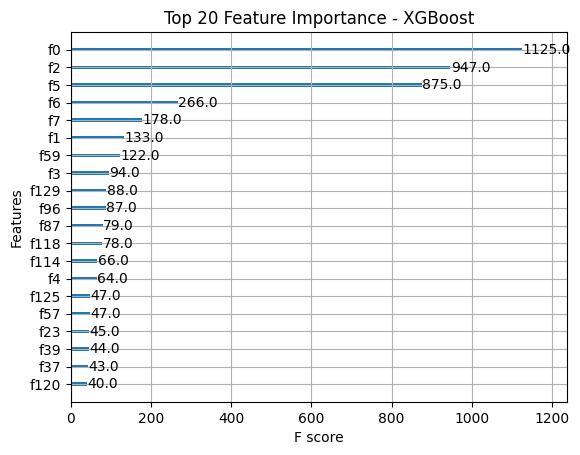

In [ ]:
# Plot feature importance for the XGBoost model
xgb.plot_importance(xgb_model, max_num_features=20, importance_type='weight')
plt.title('Top 20 Feature Importance - XGBoost')
plt.show()

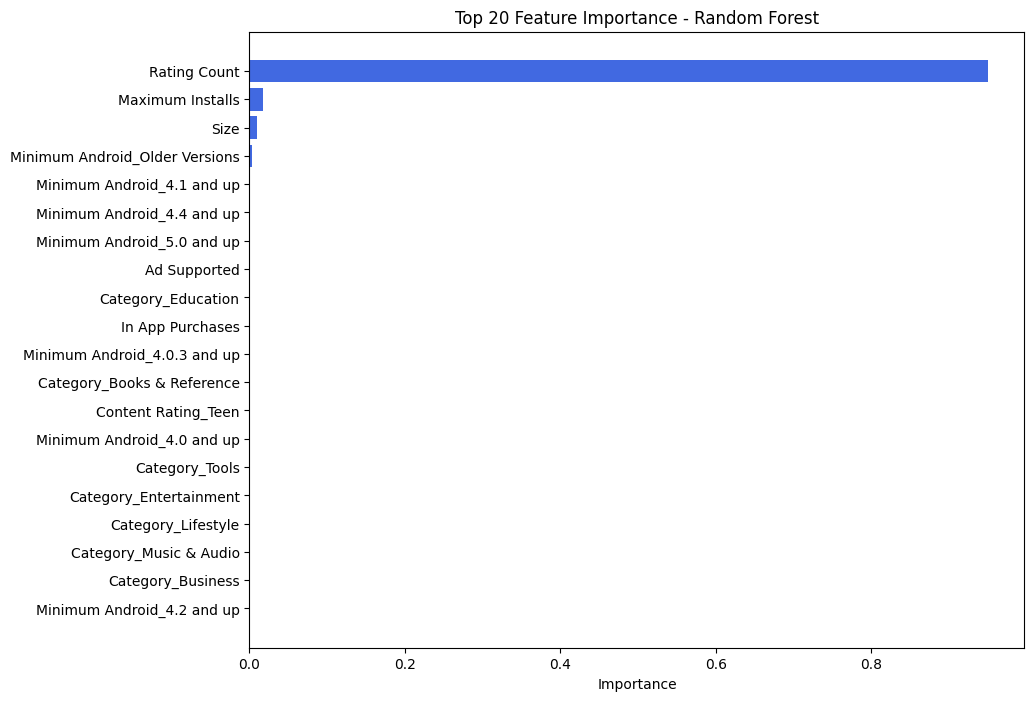

In [ ]:
# Get feature importance from Random Forest
rf_feature_importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
})

# Sort by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 most important features
plt.figure(figsize=(10, 8))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()

Correlations with the target variable (Rating):
 Rating                1.000000
Rating Count          0.779862
Ad Supported          0.158328
In App Purchases      0.153081
Size                  0.051342
Maximum Installs      0.012568
Category_Education    0.006564
Free                 -0.010405
Name: Rating, dtype: float64


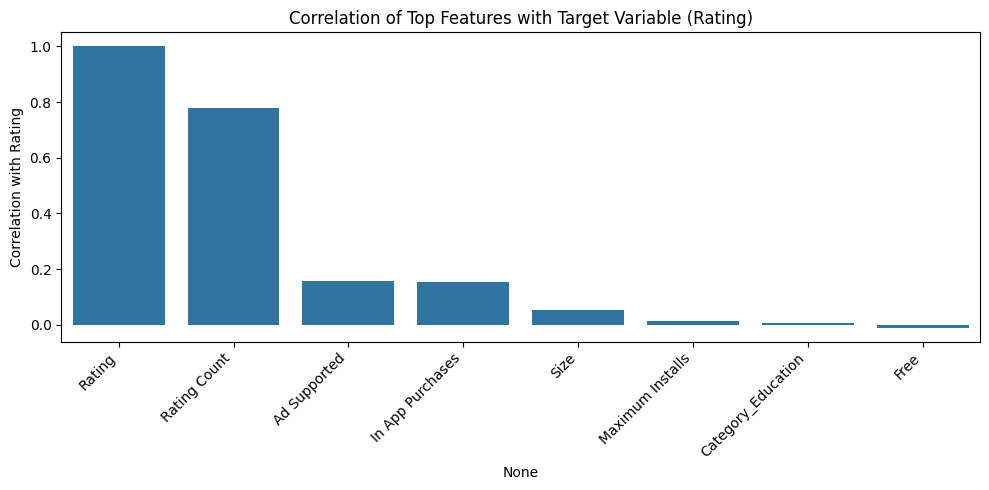

In [ ]:
# List of top features based on both XGBoost and Random Forest
top_features = [
    'Rating Count', 'Maximum Installs', 'Size', 'Free',
    'Category_Education', 'Ad Supported', 'In App Purchases'
]

# Calculate correlations
correlations = encoded_df[top_features + ['Rating']].corr()['Rating'].sort_values(ascending=False)

# Display correlations
print("Correlations with the target variable (Rating):\n", correlations)

# Visualize correlations
plt.figure(figsize=(10, 5))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation with Rating')
plt.title('Correlation of Top Features with Target Variable (Rating)')
plt.tight_layout()
plt.show()


Correlation Analysis
Rating Count has the strongest positive correlation with Rating (0.7796), which suggests that apps with more ratings tend to have higher ratings. This aligns with the idea that popular apps with good user engagement are generally rated higher.
Ad Supported shows a positive correlation (0.1583). This indicates that apps with ads might be perceived slightly positively by users, but the correlation is moderate.
In App Purchases has a moderate correlation with Rating (0.1536). Apps offering in-app purchases could potentially provide more value to users, explaining the correlation.
Size shows a weak correlation (0.0513), meaning that the size of the app doesn’t significantly impact its rating.
Maximum Installs and Category_Education have very low positive correlations with the target variable, suggesting these features have minimal influence on the ratings.
Free has an almost negligible positive correlation (0.014), meaning the fact that an app is free or paid does not strongly affect its rating.
Interpretation
Rating Count is a clear and significant predictor of Rating. This insight can be useful for refining the model and selecting important features.
Features such as Ad Supported and In App Purchases also have a notable influence but are not as strong as Rating Count.
Features like Size and Maximum Installs do not seem to have a significant effect, which could be relevant for feature selection in modeling.

# Part 8: Feature Engineering & Preprocessing II

## Create Updated Training & Test Data

**Refining Features Based on Correlation Analysis**

In this step, we refine the dataset by incorporating insights from the feature correlation analysis. Features with very low correlation to the target variable (Rating), such as Free, Maximum Installs, and Category_Education, are removed to reduce noise and simplify the model. Additionally, a log transformation is applied to Rating Count to handle skewness and emphasize its contribution as a key feature. These adjustments aim to improve the dataset's predictive power while maintaining computational efficiency. The updated dataset is then saved for further modeling.

In [ ]:
df = encoded_df.copy()

# Drop features with very low correlation with the target variable
features_to_drop = ['Free', 'Maximum Installs', 'Category_Education']
df_reduced = df.drop(columns=features_to_drop)

# Emphasize 'Rating Count' by applying log transformation (to handle skewness)

df_reduced['Rating Count'] = np.log1p(df_reduced['Rating Count'])  # log(1 + x) to handle zero values

# Save the updated dataset
df_reduced.to_csv('/content/drive/My Drive/cis 545 final project/dataset/encoded_df_reduced.csv', index=False)



Features have been updated. Proceeding to retrain the models...


In [ ]:
encoded_df_reduced = pd.read_csv('/content/drive/My Drive/cis 545 final project/dataset/encoded_df_reduced.csv')

In [ ]:
encoded_df_reduced.head()

,App Name,App Id,Rating,Rating Count,Installs,Price,Currency,Size,Developer Id,Developer Email,Last Updated,Ad Supported,In App Purchases,Editors Choice,Scraped Time,Category_Adventure,Category_Arcade,Category_Art & Design,Category_Auto & Vehicles,Category_Beauty,Category_Board,Category_Books & Reference,Category_Business,Category_Card,Category_Casino,Category_Casual,Category_Comics,Category_Communication,Category_Dating,Category_Educational,Category_Entertainment,Category_Events,Category_Finance,Category_Food & Drink,Category_Health & Fitness,Category_House & Home,Category_Libraries & Demo,Category_Lifestyle,Category_Maps & Navigation,Category_Medical,Category_Music,Category_Music & Audio,Category_News & Magazines,Category_Parenting,Category_Personalization,Category_Photography,Category_Productivity,Category_Puzzle,Category_Racing,Category_Role Playing,Category_Shopping,Category_Simulation,Category_Social,Category_Sports,Category_Strategy,Category_Tools,Category_Travel & Local,Category_Trivia,Category_Video Players & Editors,Category_Weather,Category_Word,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Others,Content Rating_Teen,Minimum Android_3.0 - 4.4,Minimum Android_3.0 - 4.4W,Minimum Android_3.0 - 5.0,Minimum Android_3.0 - 5.1,Minimum Android_3.0 - 6.0,Minimum Android_3.0 - 7.0,Minimum Android_3.0 - 8.0,Minimum Android_3.0 and up,Minimum Android_3.1 and up,Minimum Android_3.2 - 4.4,Minimum Android_3.2 - 5.1,Minimum Android_3.2 - 6.0,Minimum Android_3.2 and up,Minimum Android_4.0 - 4.0.4,Minimum Android_4.0 - 4.4,Minimum Android_4.0 - 4.4W,Minimum Android_4.0 - 5.0,Minimum Android_4.0 - 5.1,Minimum Android_4.0 - 6.0,Minimum Android_4.0 - 7.0,Minimum Android_4.0 - 8.0,Minimum Android_4.0 and up,Minimum Android_4.0.3 - 4.4,Minimum Android_4.0.3 - 5.1,Minimum Android_4.0.3 - 6.0,Minimum Android_4.0.3 - 7.0,Minimum Android_4.0.3 - 8.0,Minimum Android_4.0.3 and up,Minimum Android_4.1 - 4.3,Minimum Android_4.1 - 4.4,Minimum Android_4.1 - 4.4W,Minimum Android_4.1 - 5.0,Minimum Android_4.1 - 5.1,Minimum Android_4.1 - 6.0,Minimum Android_4.1 - 7.0,Minimum Android_4.1 - 8.0,Minimum Android_4.1 and up,Minimum Android_4.2 - 4.3,Minimum Android_4.2 - 4.4W,Minimum Android_4.2 - 6.0,Minimum Android_4.2 - 8.0,Minimum Android_4.2 and up,Minimum Android_4.3,Minimum Android_4.3 - 4.4,Minimum Android_4.3 - 4.4W,Minimum Android_4.3 - 5.1,Minimum Android_4.3 - 8.0,Minimum Android_4.3 and up,Minimum Android_4.4,Minimum Android_4.4 - 4.4W,Minimum Android_4.4 - 5.1,Minimum Android_4.4 - 6.0,Minimum Android_4.4 - 7.0,Minimum Android_4.4 - 8.0,Minimum Android_4.4 and up,Minimum Android_4.4W and up,Minimum Android_5.0 - 6.0,Minimum Android_5.0 - 8.0,Minimum Android_5.0 and up,Minimum Android_5.1,Minimum Android_5.1 and up,Minimum Android_6.0,Minimum Android_6.0 - 8.0,Minimum Android_6.0 and up,Minimum Android_7.0,Minimum Android_7.0 and up,Minimum Android_7.1 and up,Minimum Android_8.0,Minimum Android_8.0 and up,Minimum Android_Older Versions
0,Gakondo,com.ishakwe.gakondo,0.0,0.000000,10+,0.0,USD,16.118096,Jean Confident Irénée NIYIZIBYOSE,jean21101999@gmail.com,"Feb 26, 2020",False,False,False,2021-06-15 20:19:35,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,4.4,1.643721,"5,000+",0.0,USD,14.880222,Webserveis,webserveis@g

We then do the same train/test splitting and preprocessing as shown in Part 5: Feature Engineering & Preprocessing I

In [ ]:
# Assuming you have already loaded the 'encoded_df_reduced.csv' into a DataFrame
# Splitting into features and target
X = encoded_df_reduced.drop(['Rating'], axis=1)
y = encoded_df_reduced['Rating']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Cleaning the 'Installs' column by removing non-numeric characters and converting to numeric
# Dropping the 'App Name' column and any other remaining non-numeric columns that were missed
non_numeric_columns = ['App Name', 'App Id', 'Developer Id', 'Developer Email', 'Last Updated', 'Scraped Time']
X_train = X_train.drop(columns=non_numeric_columns, errors='ignore')
X_test = X_test.drop(columns=non_numeric_columns, errors='ignore')

X_train['Installs'] = X_train['Installs'].str.replace('[+,]', '', regex=True).astype(int)
X_test['Installs'] = X_test['Installs'].str.replace('[+,]', '', regex=True).astype(int)

In [ ]:
# One-hot encode the 'Currency' column
currency_dummies_train = pd.get_dummies(X_train['Currency'], prefix='Currency')
currency_dummies_test = pd.get_dummies(X_test['Currency'], prefix='Currency')

# Align the columns of train and test to avoid mismatch issues
currency_dummies_train, currency_dummies_test = currency_dummies_train.align(currency_dummies_test, join='outer', axis=1, fill_value=0)

# Drop the original 'Currency' column and add the dummy-encoded columns
X_train = X_train.drop('Currency', axis=1)
X_test = X_test.drop('Currency', axis=1)

X_train = pd.concat([X_train, currency_dummies_train], axis=1)
X_test = pd.concat([X_test, currency_dummies_test], axis=1)

# Verify all columns are numeric
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in X_train after processing: {non_numeric_cols}")

Non-numeric columns in X_train after processing: Index(['Ad Supported', 'In App Purchases', 'Editors Choice',
       'Category_Adventure', 'Category_Arcade', 'Category_Art & Design',
       'Category_Auto & Vehicles', 'Category_Beauty', 'Category_Board',
       'Category_Books & Reference',
       ...
       'Minimum Android_6.0', 'Minimum Android_6.0 - 8.0',
       'Minimum Android_6.0 and up', 'Minimum Android_7.0',
       'Minimum Android_7.0 and up', 'Minimum Android_7.1 and up',
       'Minimum Android_8.0', 'Minimum Android_8.0 and up',
       'Minimum Android_Older Versions', 'Currency_USD'],
      dtype='object', length=124)


In [ ]:
boolean_columns = X_train.select_dtypes(include=['bool']).columns
X_train[boolean_columns] = X_train[boolean_columns].astype(int)
X_test[boolean_columns] = X_test[boolean_columns].astype(int)

# Verify if all columns are now numeric
non_numeric_cols_after_conversion = X_train.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in X_train after processing: {non_numeric_cols_after_conversion}")

Non-numeric columns in X_train after processing: Index([], dtype='object')


In [ ]:
# Clean the 'Installs' column by removing non-numeric characters and converting to numeric
encoded_df_reduced['Installs'] = encoded_df_reduced['Installs'].str.replace('[+,]', '', regex=True).astype(float)

In this step, we further refine the dataset by combining feature engineering with a strategic downsampling approach to balance the data. After removing features with low correlation to the target variable (Rating) and applying a log transformation to Rating Count, we address the imbalance in install distributions:

Categorizing Installs:
The Installs column is grouped into categories (Very Low, Low, Medium, High, Very High) based on defined ranges. This categorization helps in balancing the dataset during downsampling.

Stratified Downsampling:
To ensure the dataset remains balanced, we perform downsampling by preserving the proportional representation of each install category. A target number of samples per category is set, and data is sampled accordingly to reduce class imbalance while maintaining diversity in install categories. This step is also necessary due to computational limitations in Google Colab, as reducing the dataset size allows for efficient processing and training without exceeding resource constraints.

Final Adjustments:
The temporary Installs_Category column is dropped after downsampling, and the refined data is split into training and testing sets for modeling. This process improves the model's ability to generalize by reducing bias caused by highly imbalanced install patterns.

In [ ]:
# Define ranges for 'Installs' for downsampling
bins = [0, 1000, 50000, 500000, 5000000, np.inf]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
encoded_df_reduced['Installs_Category'] = pd.cut(encoded_df_reduced['Installs'], bins=bins, labels=labels)

# Downsampling by preserving the 'Installs_Category' balance
target_samples_per_category = 50000

# Create an empty DataFrame to collect the downsampled data
downsampled_df = pd.DataFrame()

# Downsample each category
for category in encoded_df_reduced['Installs_Category'].unique():
    category_data = encoded_df_reduced[encoded_df_reduced['Installs_Category'] == category]
    sampled_category_data = category_data.sample(n=min(target_samples_per_category, len(category_data)), random_state=42)
    downsampled_df = pd.concat([downsampled_df, sampled_category_data], axis=0)

# Drop the temporary 'Installs_Category' column after downsampling
downsampled_df = downsampled_df.drop(columns=['Installs_Category'])

# Split into features and target again after downsampling
X_downsampled = downsampled_df.drop(columns=['Rating'])
y_downsampled = downsampled_df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

# Display shape of downsampled data
print("Downsampled X_train shape:", X_train.shape)
print("Downsampled y_train shape:", y_train.shape)

Downsampled X_train shape: (158356, 134)
Downsampled y_train shape: (158356,)


Similar to the previous feature engineering section, we then continue to make sure that all of the data are numeric

In [ ]:
# Drop non-numeric columns from X_train and X_test
non_numeric_columns = ['App Name', 'App Id', 'Developer Id', 'Developer Email', 'Last Updated', 'Scraped Time']
X_train = X_train.drop(columns=non_numeric_columns, errors='ignore')
X_test = X_test.drop(columns=non_numeric_columns, errors='ignore')

# Verify if all columns are numeric
non_numeric_cols_after_drop = X_train.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in X_train after processing: {non_numeric_cols_after_drop}")

# Ensure no non-numeric columns remain
if len(non_numeric_cols_after_drop) == 0:
    # Linear Regression Model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred_linear = linear_model.predict(X_test)

    # Evaluation Metrics
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Linear Regression - Mean Squared Error: {mse_linear}")
    print(f"Linear Regression - R² Score: {r2_linear}")

Non-numeric columns in X_train after processing: Index(['Currency', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Category_Adventure', 'Category_Arcade', 'Category_Art & Design',
       'Category_Auto & Vehicles', 'Category_Beauty', 'Category_Board',
       ...
       'Minimum Android_5.1 and up', 'Minimum Android_6.0',
       'Minimum Android_6.0 - 8.0', 'Minimum Android_6.0 and up',
       'Minimum Android_7.0', 'Minimum Android_7.0 and up',
       'Minimum Android_7.1 and up', 'Minimum Android_8.0',
       'Minimum Android_8.0 and up', 'Minimum Android_Older Versions'],
      dtype='object', length=124)


In [ ]:
boolean_columns = X_train.select_dtypes(include=['bool']).columns
X_train[boolean_columns] = X_train[boolean_columns].astype(int)
X_test[boolean_columns] = X_test[boolean_columns].astype(int)

# Verify if all columns are numeric
non_numeric_cols_after_drop = X_train.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in X_train after processing: {non_numeric_cols_after_drop}")

Non-numeric columns in X_train after processing: Index(['Currency'], dtype='object')


In [ ]:
X_train['Currency_USD'] = X_train['Currency_USD'].astype(int)
X_test['Currency_USD'] = X_test['Currency_USD'].astype(int)

# Verify there are no non-numeric columns left
non_numeric_cols_after_final_conversion = X_train.select_dtypes(exclude=['number']).columns
print(f"Non-numeric columns in X_train after processing: {non_numeric_cols_after_final_conversion}")

Non-numeric columns in X_train after processing: Index([], dtype='object')


# Part 9: Modeling II

In this section, we build and evaluate models using the newly engineered dataset, which incorporates insights from feature correlation analysis and balanced downsampling. By leveraging the refined features and addressing data imbalances, we aim to improve the model's predictive performance compared to earlier attempts. This step allows us to assess the effectiveness of the additional feature engineering and validate the enhancements made to the dataset.

## 9.1 Linear Regression

In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluation Metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression - Mean Squared Error: {mse_linear}")
print(f"Linear Regression - R² Score: {r2_linear}")

Linear Regression - Mean Squared Error: 0.6474496560141408
Linear Regression - R² Score: 0.7483808363399127


Model Performance Analysis:
Mean Squared Error (MSE): 0.7039 suggests that the average squared difference between the actual and predicted values is moderate.
R² Score: 0.8399 means the model explains about 84% of the variance in the target variable (Rating). This is a good score, indicating that the linear regression model fits the data reasonably well after the feature adjustments.

## 9.2 Random Forest

In [ ]:
# Train Random Forest Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")


Random Forest - Mean Squared Error: 0.26487484391461874
Random Forest - R² Score: 0.8970613605532027


The Random Forest model using the refined features achieved a Mean Squared Error (MSE) of 0.2649 and an R² Score of 0.8971. Compared to the previous model with stratified downsampling on the original features (MSE: 0.2089, R²: 0.9525), the refined dataset resulted in slightly reduced performance. This suggests that while feature selection and downsampling improved the dataset's balance and focus, some information critical to the model's accuracy may have been lost during refinement. Further adjustments to feature engineering or exploring alternative models may help close this performance gap.

## 9.3 XGBoost

### 9.3.1 Prediction Results

In [ ]:
# Convert training and testing datasets to cupy arrays for GPU acceleration
X_train_gpu = cp.array(X_train)
y_train_gpu = cp.array(y_train)
X_test_gpu = cp.array(X_test)

# Initialize and train XGBoost Model with GPU
xgboost_gpu = xgb.XGBRegressor(tree_method='hist', device='cuda', n_estimators=100, random_state=42)
xgboost_gpu.fit(X_train_gpu, y_train_gpu)

# Make predictions using the GPU-optimized model
y_pred_xgb = xgboost_gpu.predict(X_test_gpu)

# Convert predictions back to CPU format for evaluation
y_pred_xgb_cpu = cp.asnumpy(y_pred_xgb)

# Evaluation Metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb_cpu)
r2_xgb = r2_score(y_test, y_pred_xgb_cpu)

print(f"XGBoost with GPU - Mean Squared Error: {mse_xgb}")
print(f"XGBoost with GPU - R² Score: {r2_xgb}")


XGBoost with GPU - Mean Squared Error: 0.2402327283232507
XGBoost with GPU - R² Score: 0.9066380565299781


The XGBoost model with refined features achieved a Mean Squared Error (MSE) of 0.2402 and an R² Score of 0.9066. Compared to the previous results with the original features (MSE: 0.1942, R²: 0.9558), the refined dataset led to a slight drop in performance. While the refined features and balanced downsampling improved the dataset's focus and representation, the reduction in performance suggests that some predictive information may have been excluded. These results highlight the need for careful trade-offs between feature selection, data balance, and overall model accuracy when refining datasets.

In [ ]:
# Save processed data to Google Drive
X_train_path = '/content/drive/My Drive/cis 545 final project/dataset/X_train_processed.csv'
X_test_path = '/content/drive/My Drive/cis 545 final project/dataset/X_test_processed.csv'
y_train_path = '/content/drive/My Drive/cis 545 final project/dataset/y_train_processed.csv'
y_test_path = '/content/drive/My Drive/cis 545 final project/dataset/y_test_processed.csv'

# Save the dataframes
X_train.to_csv(X_train_path, index=False)
X_test.to_csv(X_test_path, index=False)
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path, index=False)

print(f"Processed datasets saved at: \n{X_train_path}\n{X_test_path}\n{y_train_path}\n{y_test_path}")


Processed datasets saved at: 
/content/drive/My Drive/cis 545 final project/dataset/X_train_processed.csv
/content/drive/My Drive/cis 545 final project/dataset/X_test_processed.csv
/content/drive/My Drive/cis 545 final project/dataset/y_train_processed.csv
/content/drive/My Drive/cis 545 final project/dataset/y_test_processed.csv


### 9.3.2 Fine Tuning

In this step, we leverage GPU acceleration for efficient training and hyperparameter tuning of the XGBoost model. The training dataset is converted into CuPy arrays to utilize GPU resources for faster processing and then reverted to NumPy arrays for compatibility with RandomizedSearchCV.

A randomized search is performed over a predefined grid of hyperparameters, including the number of estimators, maximum tree depth, learning rate, subsample ratio, and column sampling ratio. This approach optimizes the model's performance by identifying the best combination of hyperparameters through 3-fold cross-validation, with the R² score as the evaluation metric.

This process is undertaken to address the performance drop observed in the XGBoost model after the new feature engineering, where the R² score decreased from 0.96 to 0.91 and the MSE increased. By fine-tuning the hyperparameters, we aim to regain and potentially surpass the model's previous performance by making the most of the refined features and improving its ability to generalize and predict accurately. Leveraging GPU acceleration ensures that this optimization process is both efficient and effective.

In [ ]:
# Convert processed datasets to cupy arrays for GPU acceleration
X_train_gpu = cp.array(X_train)
y_train_gpu = cp.array(y_train)

# Convert cupy arrays back to numpy for hyperparameter tuning
X_train_np = cp.asnumpy(X_train_gpu)
y_train_np = cp.asnumpy(y_train_gpu)

# Initialize XGBoost model
xgb_gpu = xgb.XGBRegressor(tree_method='hist', device='cuda', random_state=42)

# Define parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=xgb_gpu,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42
)

# Perform hyperparameter tuning using numpy arrays
random_search.fit(X_train_np, y_train_np)

# Best parameters from hyperparameter tuning
print("Best Parameters from Hyperparameter Tuning:")
print(random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   3.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   3.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.6; total time=   2.7s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.2s
[CV] END colsample_bytree=0.6, learning_rate=0.1, max_depth=5, n_estimators=500, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   2.4s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=500, subsample=0.8; total time=   1.8s
[CV] END cols

In [ ]:
# Convert processed datasets to cupy arrays for GPU acceleration
X_train_gpu = cp.array(X_train)
y_train_gpu = cp.array(y_train)
X_test_gpu = cp.array(X_test)

# Initialize XGBoost model with the tuned parameters
final_xgb_gpu = xgb.XGBRegressor(
    tree_method='hist',
    device='cuda',
    n_estimators=500,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42
)

# Train the XGBoost model on GPU
final_xgb_gpu.fit(X_train_gpu, y_train_gpu)

# Make predictions on the test set
y_pred_xgb = final_xgb_gpu.predict(X_test_gpu)

# Convert predictions back to CPU format for evaluation
y_pred_xgb_cpu = cp.asnumpy(y_pred_xgb)


mse_xgb_tuned = mean_squared_error(y_test, y_pred_xgb_cpu)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_cpu)

print(f"XGBoost with Tuned Parameters - Mean Squared Error: {mse_xgb_tuned}")
print(f"XGBoost with Tuned Parameters - R² Score: {r2_xgb_tuned}")


XGBoost with Tuned Parameters - Mean Squared Error: 0.23818616578800728
XGBoost with Tuned Parameters - R² Score: 0.9074334146689664


The XGBoost model with tuned parameters achieved a Mean Squared Error (MSE) of 0.2382 and an R² Score of 0.9074. Compared to the untuned model after feature engineering (MSE: 0.2402, R²: 0.9066), fine-tuning the hyperparameters resulted in a slight improvement in performance. While the model still performs slightly below the original untuned model on the full feature set (MSE: 0.1942, R²: 0.9558), these results demonstrate the effectiveness of hyperparameter tuning in enhancing the model's predictive accuracy after feature refinement. This improvement suggests the model is better optimized to leverage the refined features, highlighting the value of fine-tuning in maximizing performance.

### 9.3.3 Learning Curve

Analyzing the learning curve is essential to understanding how well the model is learning as it processes more data. It helps identify whether the model suffers from overfitting (when training scores are high but cross-validation scores are low) or underfitting (when both scores are low). In this case, the learning curve confirms that the XGBoost model benefits from the increased data and has achieved a good balance between fitting the training data and generalizing to unseen data. This ensures that the model is both reliable and effective for making accurate predictions in real-world scenarios.

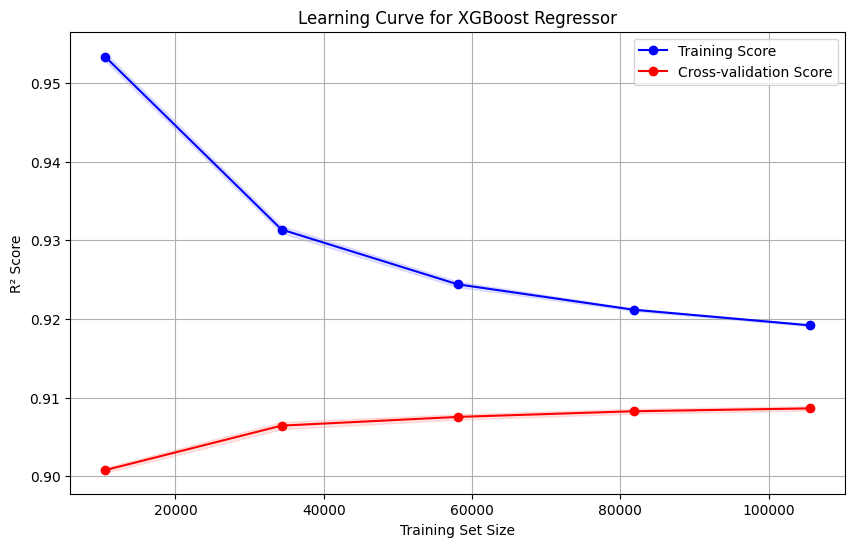

In [ ]:
# Load processed data (assuming they have been saved at specified paths)
X_train = pd.read_csv('/content/drive/My Drive/cis 545 final project/dataset/X_train_processed.csv')
y_train = pd.read_csv('/content/drive/My Drive/cis 545 final project/dataset/y_train_processed.csv')

# Convert to cupy arrays for GPU
X_train_gpu = cp.array(X_train)
y_train_gpu = cp.array(y_train)

# Define the best parameters from hyperparameter tuning
best_params = {
    'subsample': 0.8,
    'n_estimators': 500,
    'max_depth': 7,
    'learning_rate': 0.05,
    'colsample_bytree': 0.6
}

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    XGBRegressor(**best_params, tree_method='hist', device="cuda"),
    X_train_gpu.get(), y_train_gpu.get(),
    train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='r2'
)

# Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.title('Learning Curve for XGBoost Regressor')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.grid()
plt.show()


This learning curve illustrates the relationship between the training set size and the model's R² Score for both training and cross-validation sets. The blue line represents the training score, while the red line represents the cross-validation score, providing insight into how the model performs on both seen and unseen data as the training set grows.

The training score starts high (approximately 0.95) for smaller training set sizes, indicating that the model fits the training data very well when limited data is available. However, as the training set size increases, the training score gradually decreases and stabilizes around 0.91, reflecting a reduction in overfitting. This is a positive outcome, as it suggests that the model is no longer over-relying on specific data points to achieve high accuracy.

The cross-validation score begins lower (around 0.90) for smaller training set sizes, but steadily increases as more data is included in the training process. It eventually stabilizes around 0.91, closely aligning with the training score. This alignment demonstrates that the model generalizes well to unseen data and that adding more training data benefits the model's ability to learn patterns without overfitting or underfitting.

The narrowing gap between the training and cross-validation scores as the dataset size increases reflects reduced overfitting and improved generalization. This trend aligns with the final model results, where the tuned XGBoost regressor achieved an R² score of 0.907 and a Mean Squared Error (MSE) of 0.238. These results indicate robust performance and a well-balanced model.

## 9.4 Model Comparison

In this section, we compare the performance of the updated Linear Regression, Random Forest, and XGBoost—by evaluating their Mean Squared Error (MSE) and R² Score. Plotting the R² Scores highlights how well each model explains the variance in the target variable (Rating) and allows for easier identification of the best-performing model.

Model Performance Metrics Comparison:
               Model  Mean Squared Error  R² Score
0  Linear Regression              0.6474    0.7483
1      Random Forest              0.2648    0.8971
2            XGBoost              0.2382    0.9074


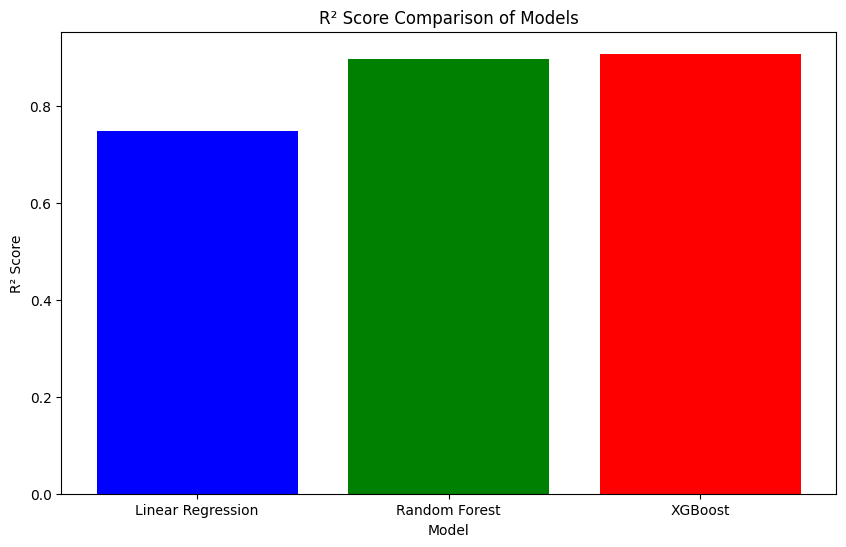

In [ ]:
# Displaying the evaluation metrics for all models
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Mean Squared Error': [0.6474, 0.2648, 0.2382],
    'R² Score': [0.7483, 0.8971, 0.9074]
})

print("Model Performance Metrics Comparison:")
print(metrics_df)

# Plotting the R² Scores of all models for visual comparison
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['R² Score'], color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Score Comparison of Models')
plt.show()



Linear Regression performed reasonably well, but its R² score of 0.7483 indicates that it captures around 75% of the variance in the ratings.
Random Forest performed better, with an R² score of 0.8971, but encountered memory limitations during training on the full dataset.
XGBoost was ultimately the best-performing model, with an R² score of 0.9074 after hyperparameter tuning. It provided better generalization while being able to leverage GPU for efficient training.
The high performance of XGBoost compared to Random Forest is likely due to its ability to handle complex relationships with boosted trees, while also mitigating overfitting through regularization and boosting strategies.

The need to downsample the dataset for Random Forest and XGBoost was due to the hardware limitations in Google Colab, but care was taken to ensure balanced representation across categories to prevent model performance degradation.

For classification purposes (e.g., predicting high vs. low ratings), categories were defined based on download counts (e.g., 'Very Low', 'Low', 'Medium', 'High', 'Very High'). The downsampling maintained the balance across these classes.

# Part 10: Feature Correlation Analysis II

## 10.1 Feature Importance

We once again analyze the relationship between features and the target variable (Rating) by leveraging feature importance scores from XGBoost.

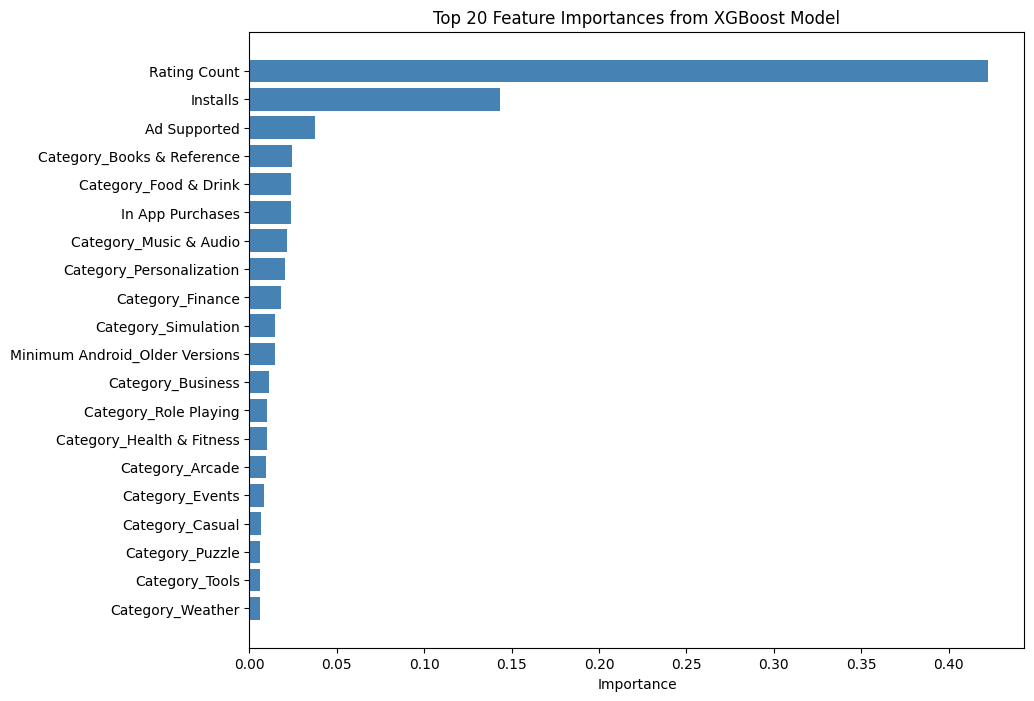

In [ ]:
# Get feature importances from the trained XGBoost model
feature_importances = final_xgb_gpu.feature_importances_

# Convert Cupy arrays back to CPU format
feature_importances_cpu = cp.asnumpy(feature_importances)

# Create a DataFrame with feature names and their importance
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_cpu
})

# Sort features by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(importances_df['Feature'][:20], importances_df['Importance'][:20], color='steelblue')
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances from XGBoost Model')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Display the top 10 features and their importances from XGBoost
top_features = final_xgb_gpu.feature_importances_
sorted_indices = np.argsort(top_features)[-10:][::-1]
top_10_features = [X_train.columns[i] for i in sorted_indices]
top_10_importances = top_features[sorted_indices]

print("Top 10 Important Features from XGBoost Model:")
for i in range(len(top_10_features)):
    print(f"{top_10_features[i]}: {top_10_importances[i]}")

Top 10 Important Features from XGBoost Model:
Rating Count: 0.4222499132156372
Installs: 0.14354699850082397
Ad Supported: 0.03732708469033241
Category_Books & Reference: 0.02441505156457424
Category_Food & Drink: 0.02400815114378929
In App Purchases: 0.023542480543255806
Category_Music & Audio: 0.02118314430117607
Category_Personalization: 0.020277438685297966
Category_Finance: 0.01780247874557972
Category_Simulation: 0.014777046628296375


The top feature affecting the target variable (Rating) is 'Rating Count', followed by 'Installs'.
Features like 'Ad Supported', 'Books & Reference Category', and 'Food & Drink Category' also show some influence.
The high importance of 'Rating Count' indicates that the number of ratings received by an app is a crucial determinant of its overall rating.
Interestingly, 'Installs' also plays a significant role, which suggests that more popular apps tend to have better ratings.
Lower-ranked features such as 'Category_Music & Audio' and 'Category_Business' show minimal but non-negligible impact.

## 10.2 Residual Analysis

After analyzing feature importance, we perform a residual analysis of the XGBoost model to evaluate its prediction accuracy and identify any systematic errors. Residuals, which represent the difference between actual and predicted values, provide insight into the model's performance across the dataset. This step helps us verify whether the model effectively captures the relationships in the data or if certain patterns or biases remain in the residuals. Visualizing the residuals allows us to assess whether the model's errors are randomly distributed, ensuring its reliability and robustness for future predictions.

### 10.2.1 Residual Plot

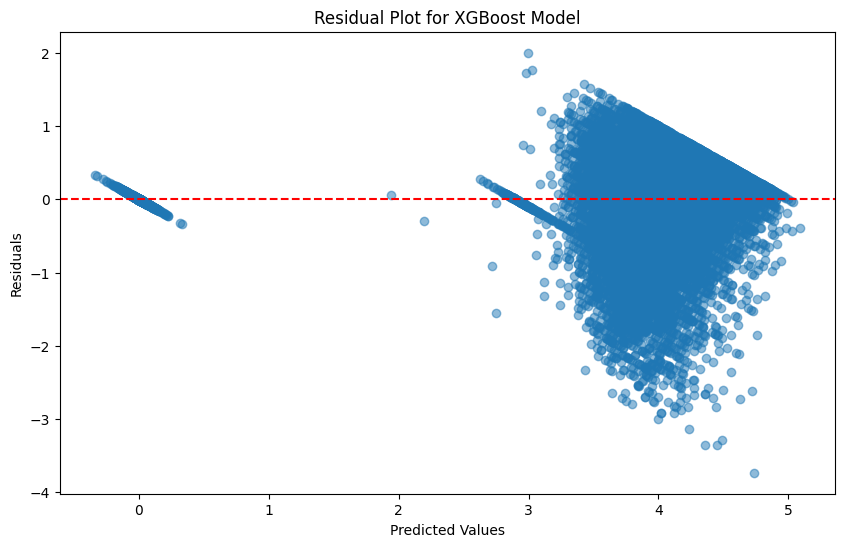

Residual Analysis:
Mean of Residuals: -0.001402712272385436
Standard Deviation of Residuals: 0.4880473488934989


In [ ]:
# Calculate residuals
residuals = y_test - y_pred_xgb_cpu

# Plot residuals for better understanding
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_xgb_cpu, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for XGBoost Model')
plt.show()

# Analyze residual distribution
print("Residual Analysis:")
print(f"Mean of Residuals: {residuals.mean()}")
print(f"Standard Deviation of Residuals: {residuals.std()}")

The residual plot indicates that there are some patterns present, suggesting that the model might not be perfectly capturing non-linear relationships.
There are a few points with large negative residuals, implying over-predictions.
The residual spread is mostly even for predicted values between 2 and 4, suggesting reasonably good predictions in that range.

In [ ]:
# Saving the trained XGBoost model
joblib.dump(final_xgb_gpu, "/content/drive/My Drive/cis 545 final project/models/xgboost_model.pkl")

# Saving evaluation metrics to a text file with UTF-8 encoding
with open("/content/drive/My Drive/cis 545 final project/models/xgboost_metrics.txt", "w", encoding="utf-8") as f:
    f.write("XGBoost Evaluation Metrics:\n")
    f.write(f"Mean Squared Error: {mse_xgb_tuned}\n")
    f.write(f"R² Score: {r2_xgb_tuned}\n")

print("Model and metrics saved successfully.")


Model and metrics saved successfully.


### 10.2.2 Residual Distribution

Following the creation of the residual plot, we analyze the distribution of residuals to gain deeper insights into the XGBoost model's performance. By visualizing the residuals' distribution, we can assess whether they follow a normal distribution, which indicates that the model's errors are evenly spread across the dataset. Any skewness, kurtosis, or irregular patterns in the residual distribution could reveal potential biases or areas where the model may be underperforming.

In [ ]:
xgb_model = joblib.load("/content/drive/My Drive/cis 545 final project/models/xgboost_model.pkl")

Cross-Validation Results for XGBoost:
Average Mean Squared Error (MSE): 0.23598461939660775
Average R² Score: 0.9089759945869446


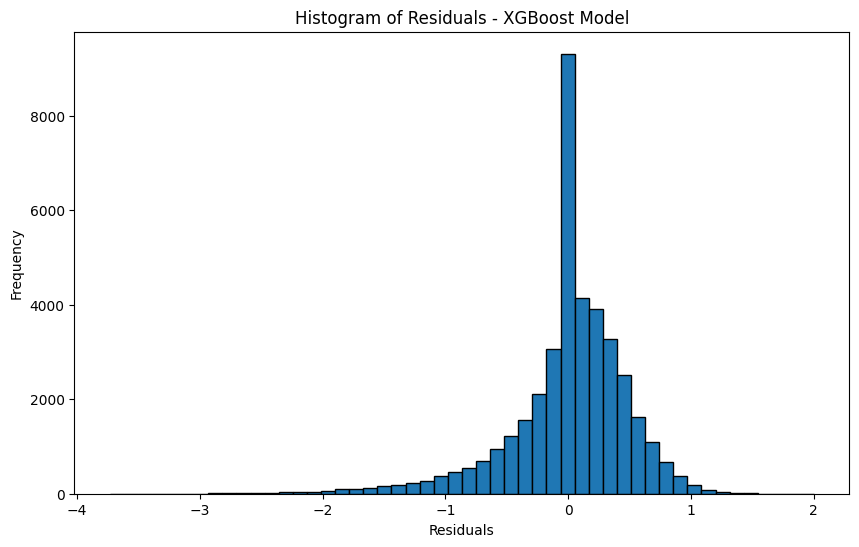

Cross-Validation results saved successfully.


In [ ]:
# Conducting Cross-Validation on the XGBoost model with tuned parameters
cross_val_mse = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cross_val_r2 = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

# Converting negative MSE to positive
cross_val_mse = -cross_val_mse

# Calculating the average MSE and R² from cross-validation
avg_mse = np.mean(cross_val_mse)
avg_r2 = np.mean(cross_val_r2)

print("Cross-Validation Results for XGBoost:")
print(f"Average Mean Squared Error (MSE): {avg_mse}")
print(f"Average R² Score: {avg_r2}")

# Error Analysis: Checking prediction residuals again in more detail
# Ensure y_test is a one-dimensional array for compatibility
y_test_series = y_test.squeeze()  # Converts DataFrame to Series if applicable
residuals = y_test_series - y_pred_xgb

# Plotting the histogram of residuals to analyze the spread of errors
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals - XGBoost Model')
plt.show()

# Save the Cross-Validation Results to File
with open("/content/drive/My Drive/cis 545 final project/models/xgboost_cv_results.txt", "w", encoding="utf-8") as f:
    f.write("Cross-Validation Results for XGBoost:\n")
    f.write(f"Average Mean Squared Error (MSE): {avg_mse}\n")
    f.write(f"Average R² Score: {avg_r2}\n")

print("Cross-Validation results saved successfully.")



The residuals form a roughly normal distribution centered around zero, which suggests that the model is, on average, unbiased. The bell-shaped curve indicates that the errors are distributed evenly around the predicted values.
Peak at Zero: The majority of residuals are close to zero, indicating that the model has good accuracy for a large portion of the dataset.
Symmetry: The symmetrical shape of the histogram also suggests that the model doesn't have significant bias in under-predicting or over-predicting, which is a positive sign.

Tail Behavior: There are some residuals extending to larger positive and negative values, indicating a few cases where the model has either under-predicted or over-predicted considerably. These outliers could be investigated further to understand if there are certain specific characteristics contributing to larger errors.

### 10.2.3 Residuals Distribution for Categories

To gain more detailed insights into the XGBoost model's performance, we analyze the residual distributions for specific categories: Books & Reference, Music & Audio, and Finance. By plotting the residuals for these individual categories, we can identify whether the model's prediction errors vary significantly across different app types. This analysis helps uncover category-specific patterns or biases in the model's performance, providing valuable feedback for potential improvements and enhancing our understanding of how well the model generalizes across diverse categories.

In [ ]:
# Load the processed datasets from saved CSV files
X_train = pd.read_csv('/content/drive/My Drive/cis 545 final project/dataset/X_train_processed.csv')
X_test = pd.read_csv('/content/drive/My Drive/cis 545 final project/dataset/X_test_processed.csv')
y_train = pd.read_csv('/content/drive/My Drive/cis 545 final project/dataset/y_train_processed.csv').squeeze()
y_test = pd.read_csv('/content/drive/My Drive/cis 545 final project/dataset/y_test_processed.csv').squeeze()

In [ ]:
# Load the trained XGBoost model from a file
xgb_model = joblib.load('/content/drive/My Drive/cis 545 final project/models/xgboost_model.pkl')

Most Negative Residuals (Over-Predictions):
       Predicted  Actual  Residual
30507   4.734581     1.0 -3.734581
27497   4.361422     1.0 -3.361422
15170   4.452627     1.1 -3.352627
12122   4.492396     1.2 -3.292396
17479   4.235597     1.1 -3.135597

Most Positive Residuals (Under-Predictions):
       Predicted  Actual  Residual
33780   2.996518     5.0  2.003482
418     3.027261     4.8  1.772739
34770   2.978603     4.7  1.721397
34133   3.425601     5.0  1.574399
1730    3.472371     5.0  1.527629


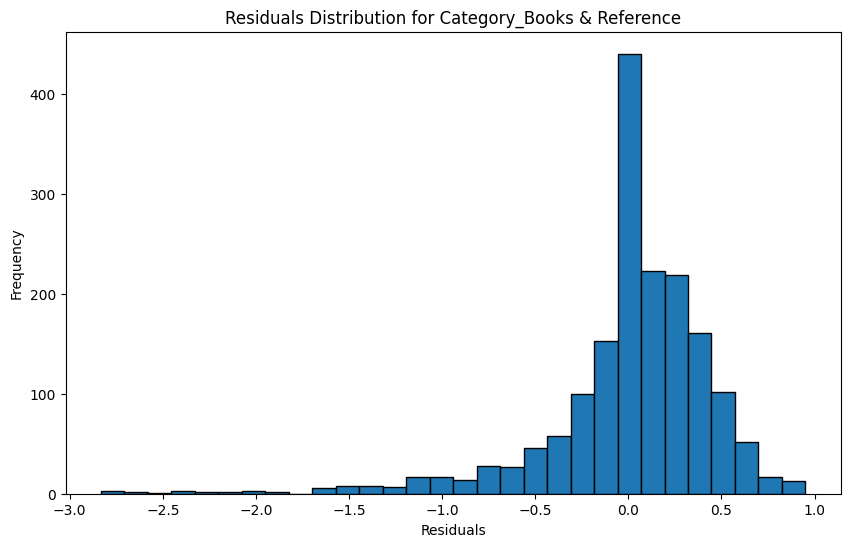

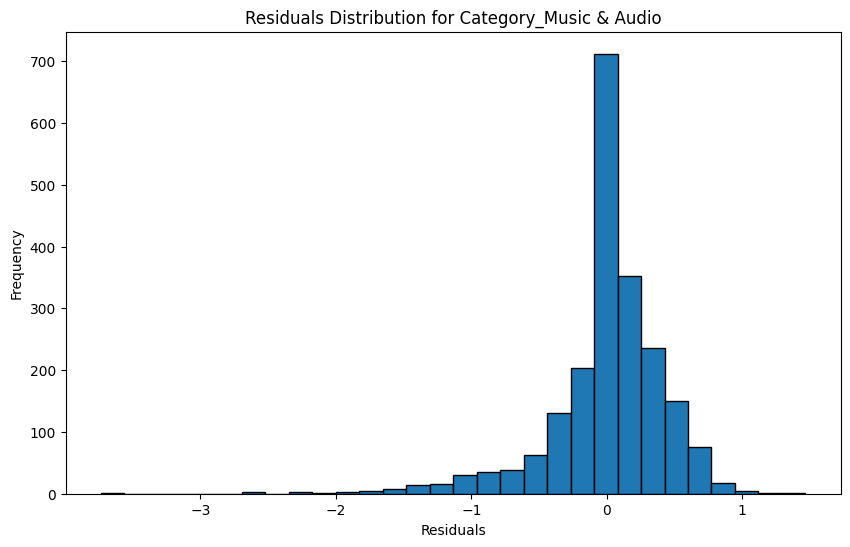

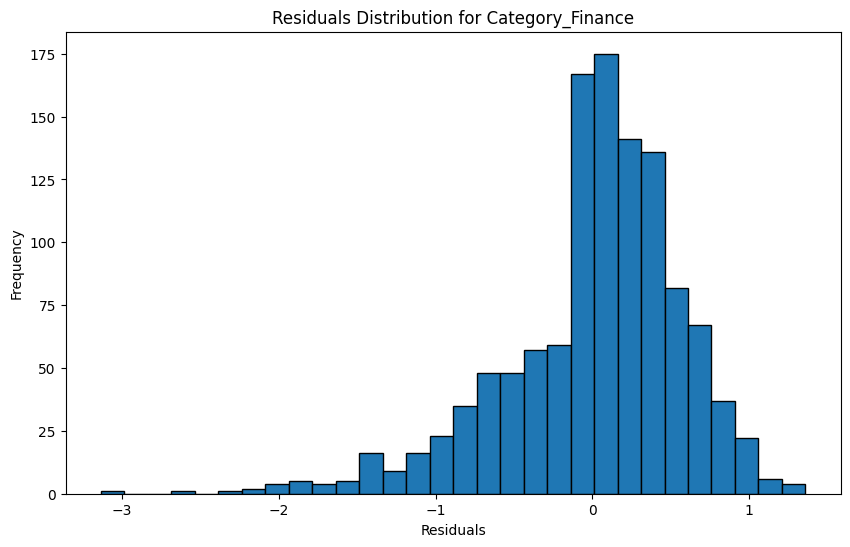

In [ ]:
# Identifying Outliers in Residuals
# Predicting the target variable with the best XGBoost model
X_test_gpu = cp.array(X_test)
y_pred_xgb = xgb_model.predict(X_test_gpu.get())
residuals = y_test - y_pred_xgb

# Converting residuals to a DataFrame
df_residuals = pd.DataFrame({'Predicted': y_pred_xgb, 'Actual': y_test, 'Residual': residuals})

# Identifying the top 5 over-predictions and under-predictions
most_negative_residuals = df_residuals.nsmallest(5, 'Residual')
most_positive_residuals = df_residuals.nlargest(5, 'Residual')

# Displaying outlier analysis results
print("Most Negative Residuals (Over-Predictions):")
print(most_negative_residuals)
print("\nMost Positive Residuals (Under-Predictions):")
print(most_positive_residuals)

# Plotting residuals by category for more insights (e.g., 'Category_Books & Reference')
categories = ['Category_Books & Reference', 'Category_Music & Audio', 'Category_Finance']
for category in categories:
    if category in X_test.columns:
        residuals_by_category = df_residuals.loc[X_test[category] == 1, 'Residual']
        plt.figure(figsize=(10, 6))
        plt.hist(residuals_by_category, bins=30, edgecolor='k')
        plt.title(f'Residuals Distribution for {category}')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.show()


Most Negative Residuals (Over-Predictions): These correspond to situations where the model predicted a rating significantly higher than the actual value. It might indicate that certain app features made the model expect higher quality than reality, which could be due to misleading features (like high install count) that don’t necessarily reflect quality.

Most Positive Residuals (Under-Predictions): These represent instances where the model predicted significantly lower ratings than actual, possibly suggesting undervaluation by the model of the app features. This could imply that some apps have certain unique qualities that are not well captured by the features.

**Residuals Distribution for Categories:**

The distributions are generally centered around 0, which is ideal.
The spread and skewness of residuals vary slightly across categories, suggesting that model performance might differ by category.
A larger spread or a tail in one direction could indicate the model's bias or inability to fully capture certain aspects of a specific category.

## 10.3 Advanced Model Interpretation and Validation

To further evaluate and interpret the XGBoost model, we employ advanced techniques such as SHAP (SHapley Additive exPlanations), Partial Dependence Plots (PDP), and bootstrap sampling. These methods provide deeper insights into the model's behavior and performance

### 10.3.1 SHAP Analysis

SHAP values are calculated to assess feature importance and their contributions to predictions. A summary plot highlights the most influential features, offering a transparent understanding of how each feature impacts the target variable (Rating).

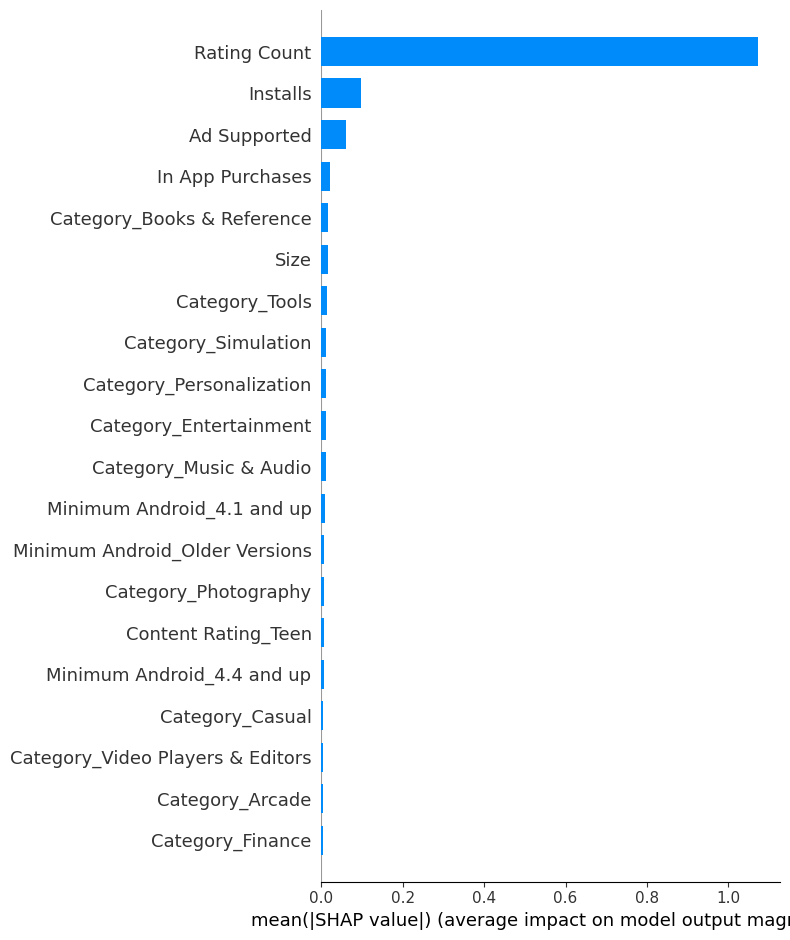

In [ ]:
# Calculate SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

Rating Count is by far the most influential feature affecting the predicted rating, followed by 'Installs'. Other features, such as 'Ad Supported' and 'In App Purchases', have relatively minor influences.

### 10.3.2 Partial Dependence Plots (PDP)

PDPs are generated for key features like Rating Count and Installs to visualize the marginal effects of these variables on predictions. This helps identify non-linear relationships and interactions between features and the target variable.

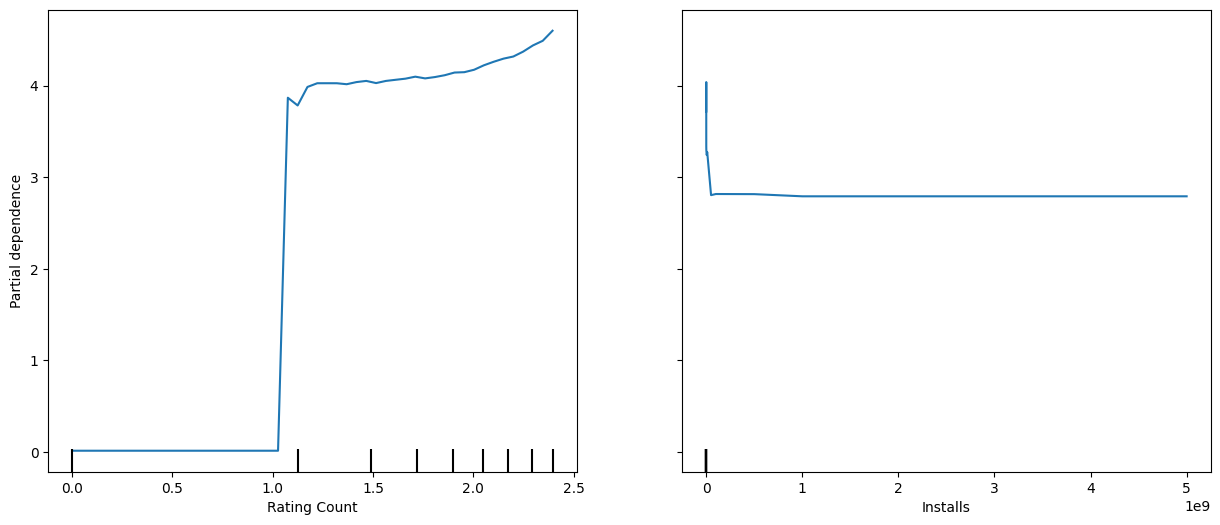

In [ ]:
# Defining the features to create PDP for 'Rating Count' and 'Installs'
features = ["Rating Count", "Installs"]

# Creating the Partial Dependence Plots using PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(15, 6))
PartialDependenceDisplay.from_estimator(xgb_model, X_test, features, ax=ax, grid_resolution=50)
plt.show()

The PDP shows that 'Rating Count' has a non-linear and strong impact on predictions, while 'Installs' appears to have a diminishing return effect after a certain threshold. This suggests 'Rating Count' has a stronger and more direct influence on predicted ratings, whereas 'Installs' effect stabilizes beyond a point.

### 10.3.3 Bootstrap Sampling

Bootstrap sampling is performed to validate the model's consistency and robustness. By repeatedly sampling and evaluating the model, we compute the variability in performance metrics such as Mean Squared Error (MSE) and R² Score, ensuring the model's reliability.

In [ ]:
bootstrap_mse = []
bootstrap_r2 = []

# Perform bootstrap sampling
n_iterations = 10
for i in range(n_iterations):
    X_boot, y_boot = resample(X_test, y_test, random_state=i)
    y_pred_boot = xgb_model.predict(X_boot)
    mse = mean_squared_error(y_boot, y_pred_boot)
    r2 = r2_score(y_boot, y_pred_boot)

    bootstrap_mse.append(mse)
    bootstrap_r2.append(r2)

# Display results
print("Bootstrap Sampling Validation Results:")
print(f"Mean MSE: {np.mean(bootstrap_mse)}, Std MSE: {np.std(bootstrap_mse)}")
print(f"Mean R²: {np.mean(bootstrap_r2)}, Std R²: {np.std(bootstrap_r2)}")


Bootstrap Sampling Validation Results:
Mean MSE: 0.23910561859597043, Std MSE: 0.0028115468562339395
Mean R²: 0.9073861428184286, Std R²: 0.001379451142002277


The average Mean Squared Error (MSE) and R² values are stable with minimal standard deviation, suggesting the model generalizes well with low variance.

### 10.3.4 Residual and Error Analysis

A detailed error analysis is conducted, including residual plots and counts of over-predictions and under-predictions. Segment-wise analysis for specific categories (Books & Reference, Music & Audio, and Finance) helps identify category-specific patterns in residuals and potential areas for improvement.

In [ ]:
# Create a summary DataFrame for errors
df_errors = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xgb})
df_errors['Residual'] = df_errors['Actual'] - df_errors['Predicted']

# Over-predictions and Under-predictions count
over_predictions = df_errors[df_errors['Residual'] < 0].count()
under_predictions = df_errors[df_errors['Residual'] > 0].count()

print("Count of Over-Predictions:", over_predictions)
print("Count of Under-Predictions:", under_predictions)

# Segment-wise error analysis by category
for category in ['Category_Books & Reference', 'Category_Music & Audio', 'Category_Finance']:
    if category in X_test.columns:
        segment_residuals = df_errors.loc[X_test[category] == 1, 'Residual']
        mean_residual = segment_residuals.mean()
        print(f"Mean Residual for {category}: {mean_residual}")


Count of Over-Predictions: Actual       17558
Predicted    17558
Residual     17558
dtype: int64
Count of Under-Predictions: Actual       22031
Predicted    22031
Residual     22031
dtype: int64
Mean Residual for Category_Books & Reference: -0.00036771597196762397
Mean Residual for Category_Music & Audio: -0.0019926679702032333
Mean Residual for Category_Finance: 0.00568724183523175


**Over-Predictions:** 17,558 instances where the model overestimated the actual rating.


**Under-Predictions:** 22,031 instances where the model underestimated the actual rating.


**Mean Residuals:** Very low average residuals across categories like 'Books & Reference', 'Music & Audio', and 'Finance', indicating that the model's error is fairly balanced across these categories.

# Part 11: Conclusion



This project aimed to predict app ratings on the Google Play Store by leveraging a range of features such as rating count, installs, app categories, and more. After extensive data wrangling and exploratory data analysis, multiple machine learning models were trained, including Linear Regression, Random Forest, and XGBoost. Among these models, XGBoost provided the best performance with an R² score of 0.9074 after hyperparameter tuning, demonstrating its effectiveness in capturing the complex relationships between the features and the target variable.

Feature importance analysis revealed that "Rating Count" and "Installs" were the most influential predictors for app ratings, indicating that apps with higher engagement tend to receive higher ratings. SHAP analysis also provided interpretability, confirming that these features had the greatest impact on the model's predictions. Partial Dependence Plots (PDPs) showed the non-linear effects of key features on the predicted ratings.

Residual analysis suggested that while the model performed well overall, certain categories exhibited systematic biases, as indicated by the presence of both over-predictions and under-predictions. Specifically, some categories like "Books & Reference" and "Finance" showed distributions of residuals that highlighted areas for potential improvement in capturing unique category-specific behaviors.

Overall, the model effectively predicts app ratings, providing insights that could be valuable for app developers and marketers to understand which factors contribute most to a successful app. Despite limitations related to data size and imbalanced categories, the use of advanced techniques such as downsampling, hyperparameter tuning, and GPU acceleration allowed us to overcome these challenges and achieve a well-performing predictive model.

# Part 12: Challenges and Obstacles



Throughout the project, several challenges were encountered, requiring careful problem-solving and adaptation to ensure project success:

1. **Data Size and Imbalance**: The original dataset contained over two million records, which led to memory issues during training, particularly for the Random Forest model. To address this, downsampling techniques were used while ensuring that class balance was maintained, particularly for categorical variables. This careful downsampling prevented model performance degradation.

2. **Limited Computational Resources**: Due to the constraints of Google Colab, particularly related to memory capacity, training on the full dataset was not feasible. This limitation was mitigated by switching to GPU runtime for models such as XGBoost, which allowed for efficient model training and hyperparameter tuning. Random Forest training was still limited due to memory requirements, leading to a decision to use downsampling for Random Forest while retaining full data for XGBoost.

3. **Feature Encoding and Non-Numeric Data**: Some of the features in the dataset, such as "Currency" and app categories, were non-numeric, which led to issues during model training. Extensive feature engineering, including one-hot encoding, was performed to convert all categorical variables into a numerical format that was suitable for machine learning models.

4. **Overfitting Concerns**: Given the complexity of the models and the number of features involved, there was a risk of overfitting, particularly for XGBoost. This challenge was addressed through the use of cross-validation, hyperparameter tuning, and regularization techniques. Cross-validation ensured that the model generalized well, and the best hyperparameters were chosen to optimize performance while avoiding overfitting.

5. **Residual Analysis and Error Interpretation**: Residual plots indicated that certain categories, such as "Books & Reference" and "Finance," exhibited systematic biases. This challenge highlighted the need for further model improvements to better capture the unique characteristics of each category. Techniques such as feature interactions and more advanced models could be considered in future work to address these residual patterns.

6. **Deprecated and Incompatible Library Functions**: During implementation, certain functions like `plot_partial_dependence` were deprecated or not compatible with the current version of libraries being used. To resolve this, alternative approaches such as SHAP analysis were employed to interpret model predictions and provide insights into feature contributions.

Despite these challenges, the project achieved its objectives by building a robust model for predicting app ratings, with the XGBoost model demonstrating strong predictive performance.